This notebook attempts to run classification using three categories: 'Very Happy', 'Happy' and 'Unhappy'

In [2]:
from collections import defaultdict
import pandas as pd
import csv
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import seaborn
from sklearn.neighbors import KNeighborsClassifier
import json

/Users/jitsen/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Read Original GSS Datafile

In [3]:
GSS = pd.read_excel('GSS4.xls', names = ['year','natrace','natarms','nataid',
'natfare','relig','fund','raclive','happy','satfin','finalter','finrela','coop','comprend',
'sample','oversamp','realinc','nateduc','natdrug','natcity','id_','wrkstat','hrs1','hrs2',
'evwork','wrkslf','indus10','age','sex','race','mobile16','earnrs','partyid','polviews',
'natenvir','natheal','realrinc'])

Remove Unnecessary Columns

In [4]:
GSS = GSS[['year','natrace','natarms','nataid',
'natfare','relig','fund','raclive','happy','satfin','finalter','finrela','coop','comprend',
'sample','oversamp','realinc','nateduc','natdrug','natcity','id_','wrkstat','wrkslf','indus10',
'age','sex','race','mobile16','earnrs','partyid','polviews',
'natenvir','natheal','realrinc']]

Remove Rows and Columns to Derive Clean Answers (Get Rid of 'Not Applicable')

In [5]:
GSS = GSS[GSS.natrace != 'Not applicable']
GSS = GSS[GSS.natarms != 'Not applicable']
GSS = GSS[GSS.nataid != 'Not applicable']
GSS = GSS.replace({'Not applicable': np.nan}).dropna()
len(GSS)

29779

Import Coding Schema from Separate CSV File

In [6]:
labels = defaultdict(list)

with open('GSSlabels_red.csv', encoding="utf-8") as f:
    reader = csv.reader(f)
    rows_f = [tuple(row) for row in reader]

for k,v,l in rows_f:
        labels[k].append((v,l))    

Apply Numerical Values to Pandas Dataframe Based on Coding Schema

In [7]:
dictionaries={}
for label in labels:
    dictionaries[label]={k:v for (v, k) in labels[label]}

GSS2=GSS.copy()
for i in GSS2.columns:
    if i in dictionaries:
        GSS2[i]=GSS2[i].replace(dictionaries[i])   

In [8]:
GSS2 = GSS2.dropna()
GSS2.columns

Index(['year', 'natrace', 'natarms', 'nataid', 'natfare', 'relig', 'fund',
       'raclive', 'happy', 'satfin', 'finalter', 'finrela', 'coop', 'comprend',
       'sample', 'oversamp', 'realinc', 'nateduc', 'natdrug', 'natcity', 'id_',
       'wrkstat', 'wrkslf', 'indus10', 'age', 'sex', 'race', 'mobile16',
       'earnrs', 'partyid', 'polviews', 'natenvir', 'natheal', 'realrinc'],
      dtype='object')

Get Dummies for Categorical Variables Which Cannot be Numbered on Ordinal Scale

In [9]:
GSS3 = pd.get_dummies(GSS2, drop_first = True,columns=['wrkstat','relig','sex','race'])

Further Clean Up

In [10]:
GSS3 = GSS3[GSS.age != 'No answer']
GSS3 = GSS3[GSS.age != "Don't know"]
GSS3 = GSS3[GSS.earnrs != "No answer"]

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Assign Columns from Data Frame to Variables for Fitting

In [11]:
columns = ['year', 'natrace', 'natarms', 'nataid', 'natfare', 'fund',
       'satfin', 'finalter', 'finrela', 'coop', 'comprend','nateduc', 'natdrug', 'natcity', 
       'wrkslf', 'indus10', 'age', 'mobile16', 'earnrs',
       'natenvir', 'natheal','raclive','partyid', 
       'wrkstat_No answer', 'wrkstat_Other', 'wrkstat_Retired',
       'wrkstat_School', 'wrkstat_Temp not working',
       'wrkstat_Unempl, laid off', 'wrkstat_Working fulltime',
       'wrkstat_Working parttime', 'relig_Catholic', 'relig_Christian',
       "relig_Don't know", 'relig_Hinduism', 'relig_Inter-nondenominational',
       'relig_Jewish', 'relig_Moslem/islam', 'relig_Native american',
       'relig_No answer', 'relig_None', 'relig_Orthodox-christian', 'race_Other', 'race_White',
       'relig_Other', 'relig_Other eastern', 'relig_Protestant', 'sex_Male','polviews']

X = GSS3[columns]

y = GSS3['happy']

Run First Model on Random Forest Classifier

In [12]:
rand_forest = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rand_forest.fit(X_train, y_train)
y_test_pred_rand_forest = rand_forest.predict(X_test)
accuracy_rand_forest = metrics.accuracy_score(y_test, y_test_pred_rand_forest)
print(accuracy_rand_forest,classification_report(y_test, y_test_pred_rand_forest))

0.525987996829              precision    recall  f1-score   support

          1       0.41      0.37      0.39      2825
        1.5       0.00      0.00      0.00        43
          2       0.58      0.71      0.64      4943
          3       0.32      0.08      0.13      1020

avg / total       0.49      0.53      0.50      8831



In [13]:
y_test.value_counts()

2      4943
1      2825
3      1020
1.5      43
Name: happy, dtype: int64

Remove 'Ambivalent'(1.5) Label

In [14]:
GSS3['happy'].value_counts()
GSS3 = GSS3[GSS3['happy'] != str(1.5)]

Upsample Minority Labels on Train Set

In [15]:
rand_forest2 = RandomForestClassifier()
GSS_train2, GSS_test2 = train_test_split(GSS3, test_size=0.3)
GSS_train_u = GSS_train2[GSS_train2['happy']=='3']
GSS_train_m = GSS_train2[GSS_train2['happy']=='2']
GSS_train_v = GSS_train2[GSS_train2['happy']=='1']

GSS_train2['happy'].value_counts()

2    11448
1     6622
3     2435
Name: happy, dtype: int64

By How Much Do We Need to Upsample?

In [16]:
11568-6550,11487-2387

(5018, 9100)

In [17]:
GSS_train_u_s = resample(GSS_train_u, 
                                 replace=True,  
                                 n_samples=9100)    # to match majority class
GSS_train_v_s = resample(GSS_train_v, 
                                 replace=True,     
                                 n_samples=5018)
# Combine majority class with upsampled minority class
GSS_upsampled= pd.concat([GSS_train2, GSS_train_u_s, GSS_train_v_s])

GSS_upsampled['happy'].value_counts()

1    11640
3    11535
2    11448
Name: happy, dtype: int64

In [18]:
X_train_up = GSS_upsampled[columns]

y_train_up = GSS_upsampled['happy']

X_test_up = GSS_test2[columns]

y_test_up = GSS_test2['happy']

len(X_train_up), len(y_train_up), len(X_test_up)

(34623, 34623, 8788)

Run Model Again

In [19]:
def train_fit(X_train,y_train,X_test,y_test):
    rand_forest = RandomForestClassifier(n_estimators=100, min_samples_split=10)
    rand_forest.fit(X_train, y_train)
    y_pred_train = rand_forest.predict(X_train)
    y_pred_test = rand_forest.predict(X_test)
    print('test',metrics.accuracy_score(y_test,y_pred_test), 'train', metrics.accuracy_score(y_train, y_pred_train),classification_report(y_test, y_pred_test))
    print(metrics.confusion_matrix(y_test, y_pred_test))

train_fit(X_train_up,y_train_up,X_test_up,y_test_up)

test 0.555644060082 train 0.99249054097              precision    recall  f1-score   support

          1       0.47      0.42      0.44      2749
          2       0.61      0.70      0.65      5019
          3       0.36      0.22      0.27      1020

avg / total       0.54      0.56      0.54      8788

[[1149 1528   72]
 [1189 3513  317]
 [ 107  692  221]]


Run grid search on optimal number of trees annd splits

In [20]:
def train_fit(X_train,y_train,X_test,y_test,e,s):
    rand_forest = RandomForestClassifier(n_estimators=e, min_samples_split=s)
    rand_forest.fit(X_train, y_train)
    y_pred_train = rand_forest.predict(X_train)
    y_pred_test = rand_forest.predict(X_test)
    return 'est=%s'%e, 'split=%s' %s,'test', metrics.accuracy_score(y_test,y_pred_test), 'train', metrics.accuracy_score(y_train, y_pred_train)

y_list = []
for e in range(10,101,10):
    for s in range(2,6,1):
        y_list.append(train_fit(X_train_up, y_train_up, X_test_up,y_test_up,e,s))

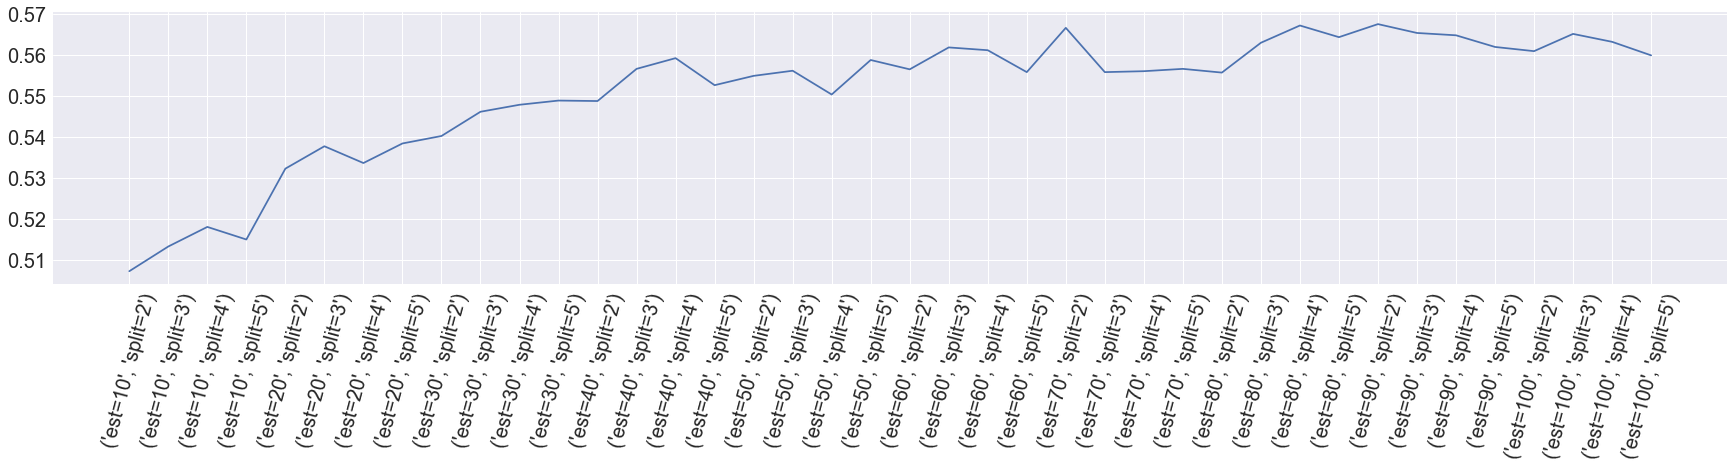

In [21]:
plt.figure(figsize = (30,5))
plt.plot([x for x in range(0,40)], [float(x[3]) for x in y_list]);
plt.xticks([x for x in range(0,40)],[x[0:2] for x in y_list], rotation = 75, fontsize = 20);
plt.yticks(fontsize = 20)
plt.show();

Group feature importances by year

In [22]:
GSS_year = {k: v for k, v in GSS3.groupby('year')}

features_dict = {}
for k,v in GSS_year.items():
    X = v[columns]

    y = v['happy']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    rand_forest = RandomForestClassifier()
    fit = rand_forest.fit(X_train, y_train)
    features=sorted(zip(X_train.columns,fit.feature_importances_),key = lambda x: x[1], reverse=True)
    features_dict[k] = features

Group feature importances by year and plot them

In [23]:
feat_by_year = defaultdict(list)

for k,v in features_dict.items():
    for i,j in v:
        feat_by_year[i].append({k:j})

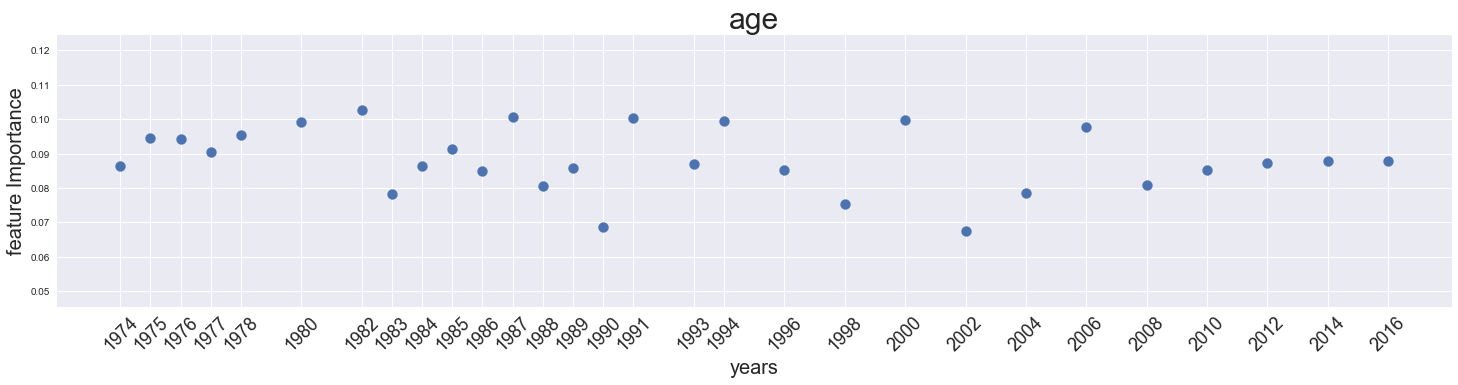

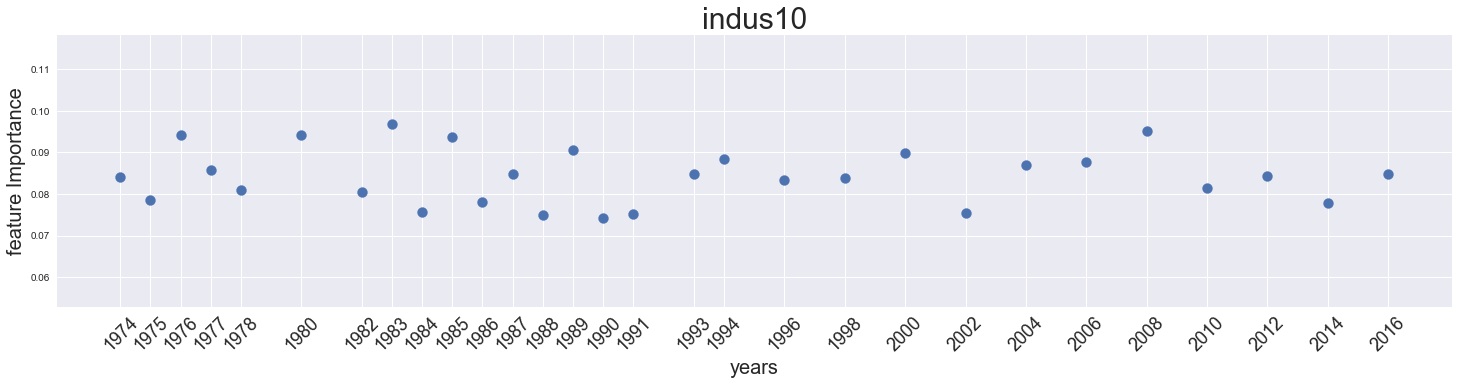

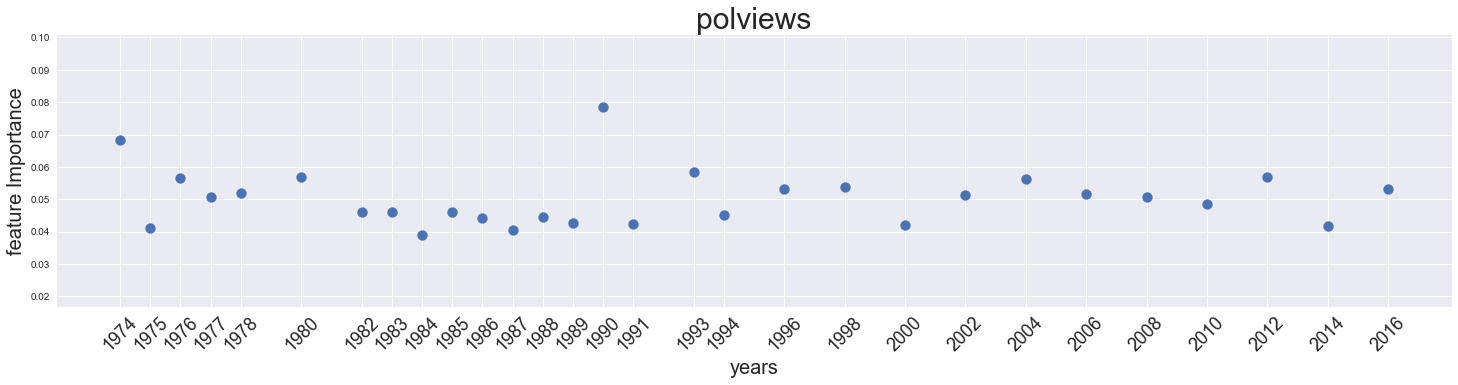

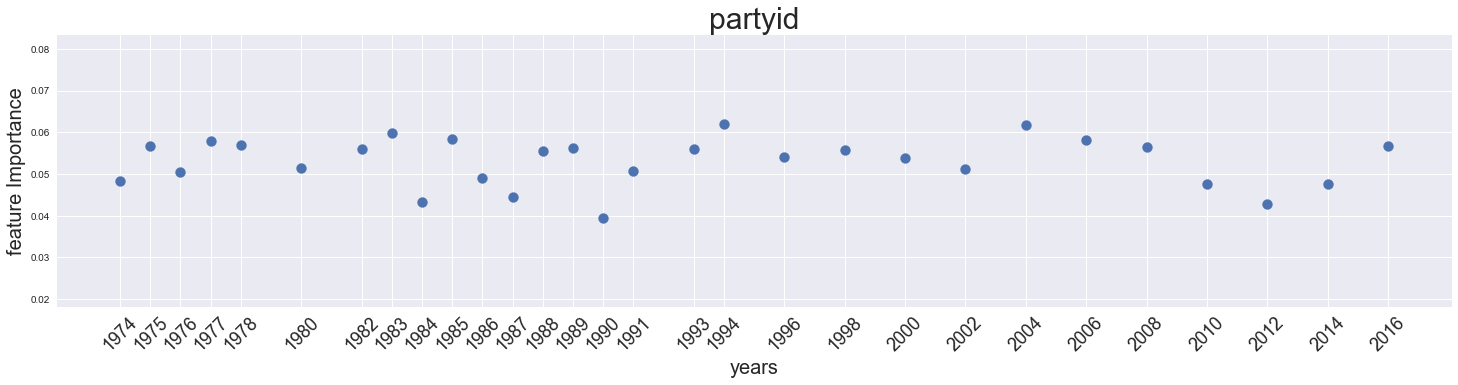

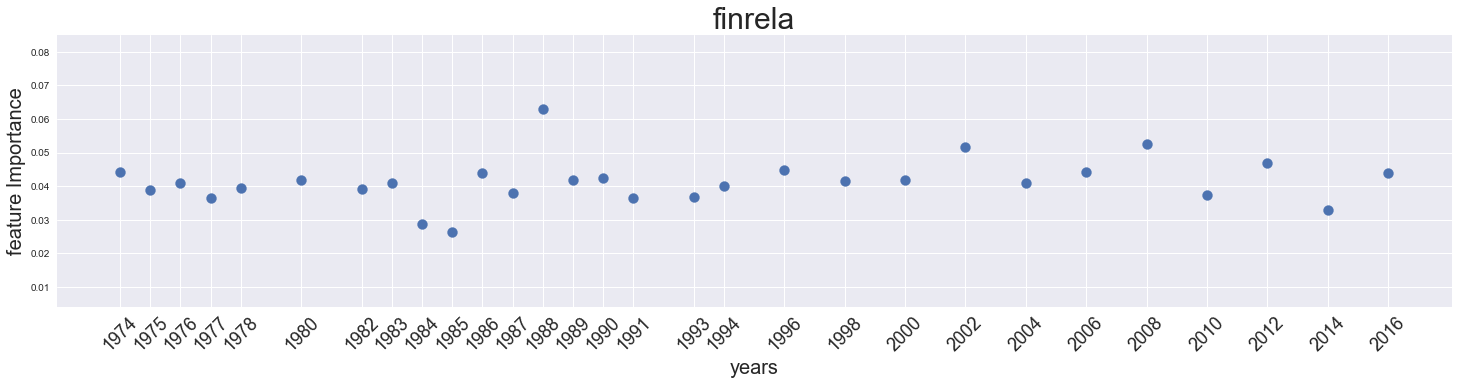

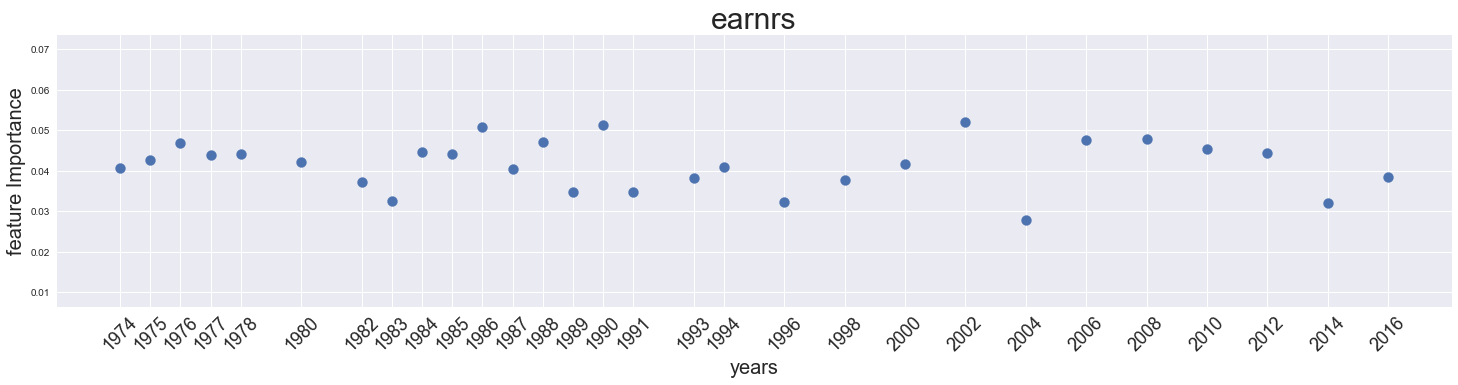

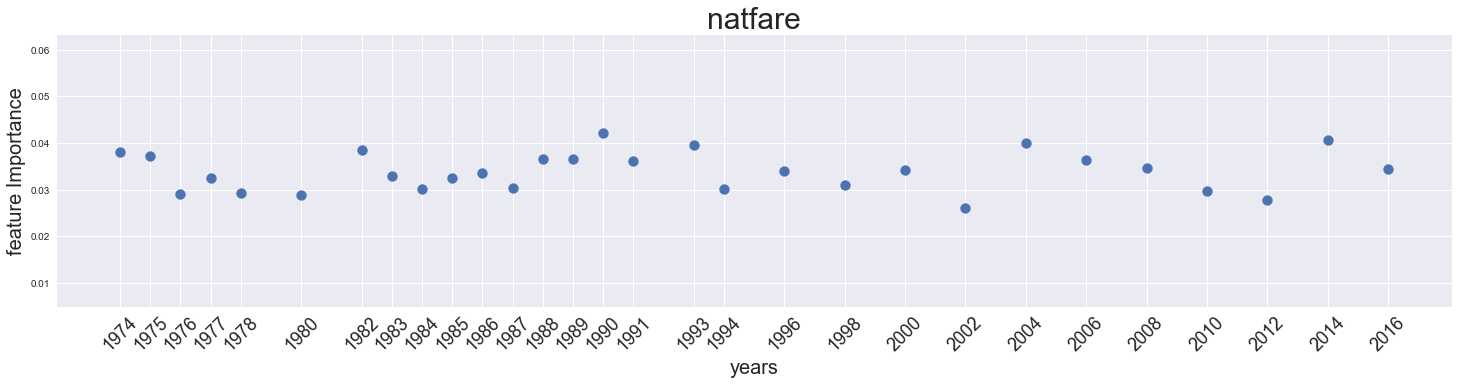

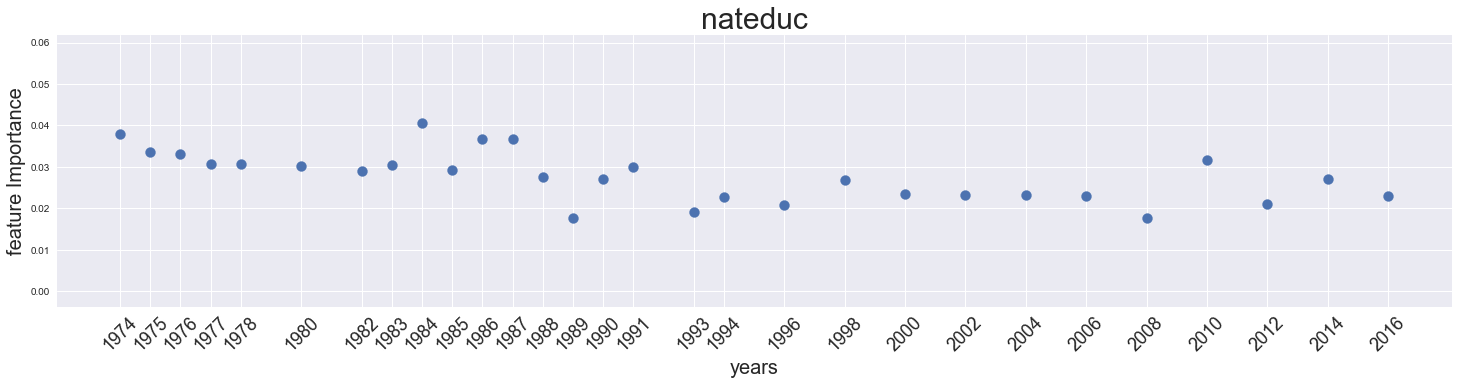

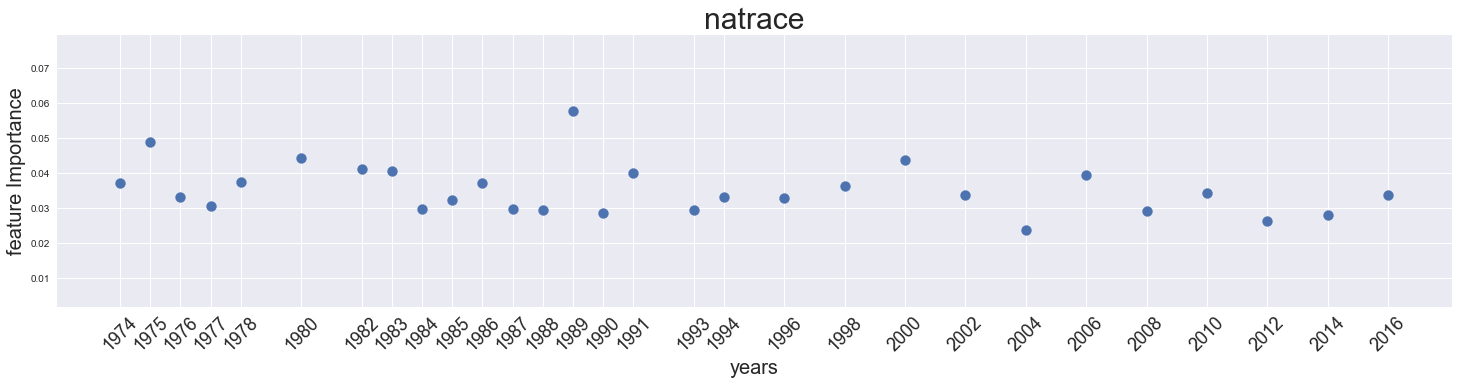

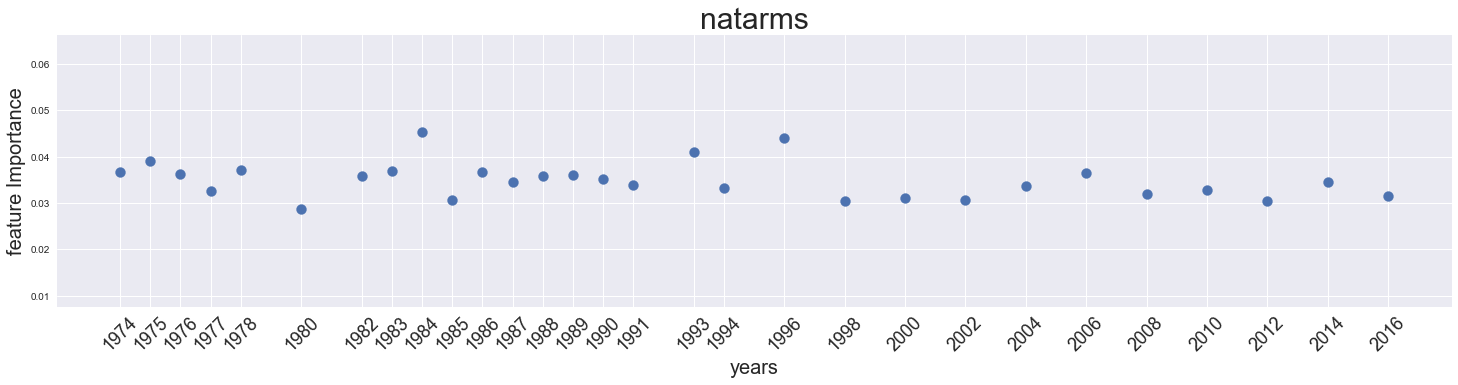

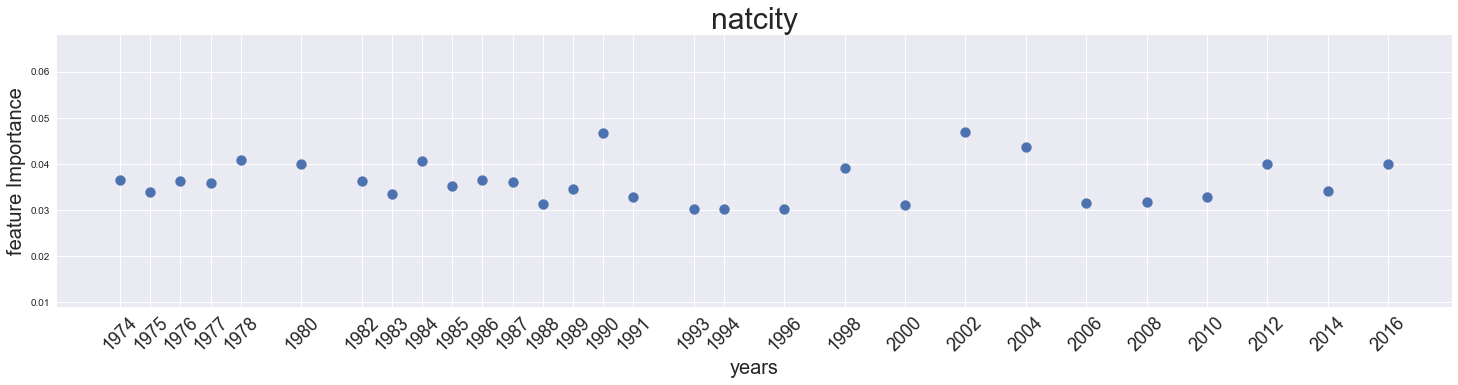

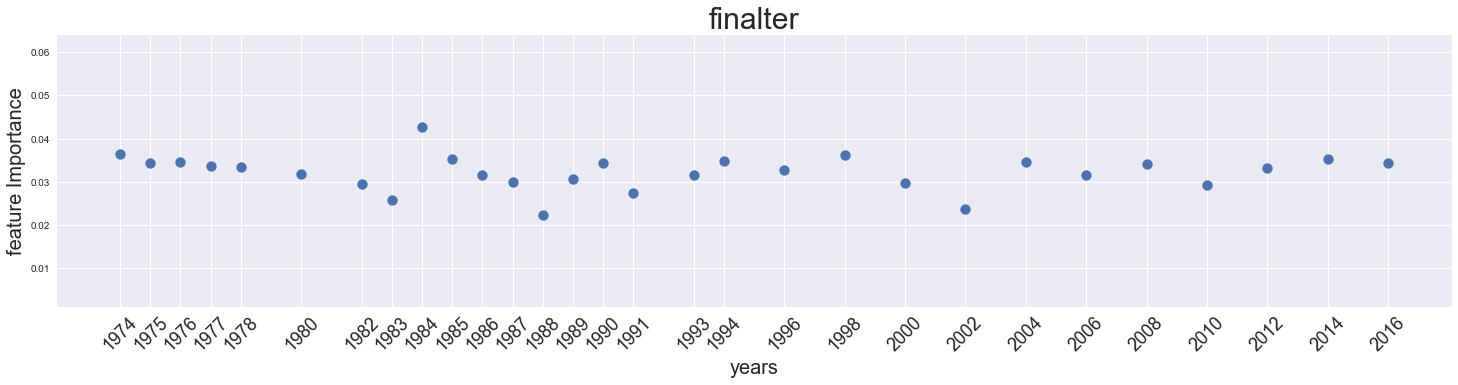

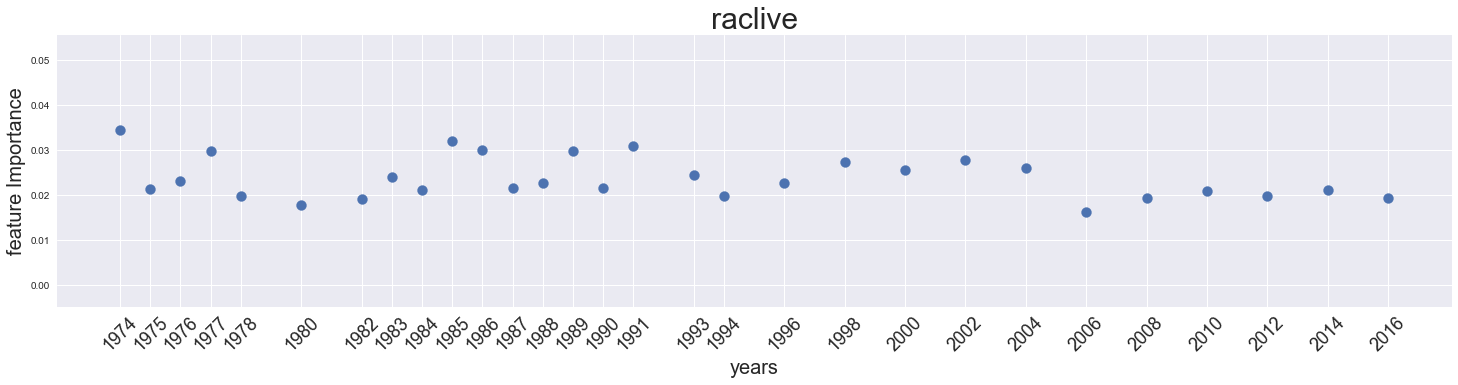

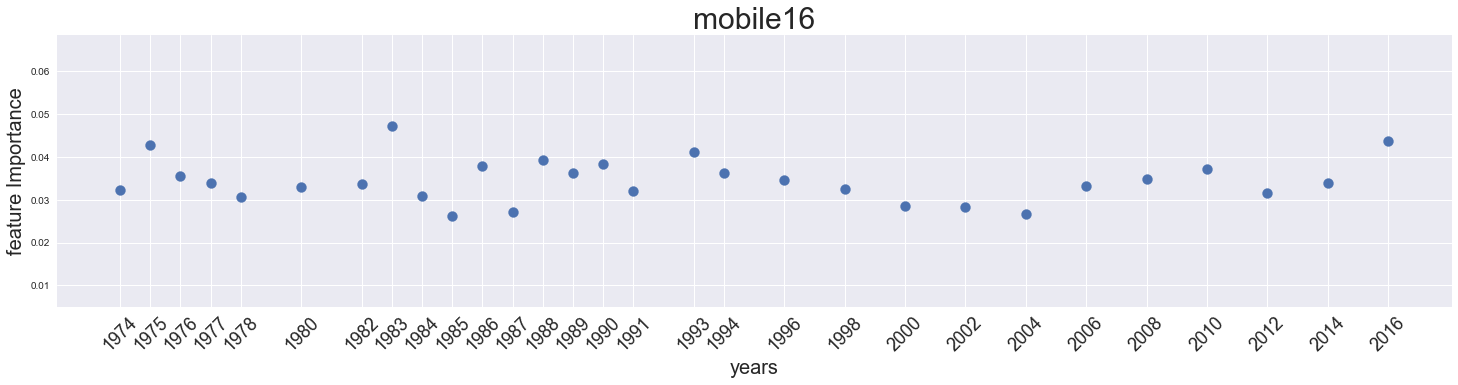

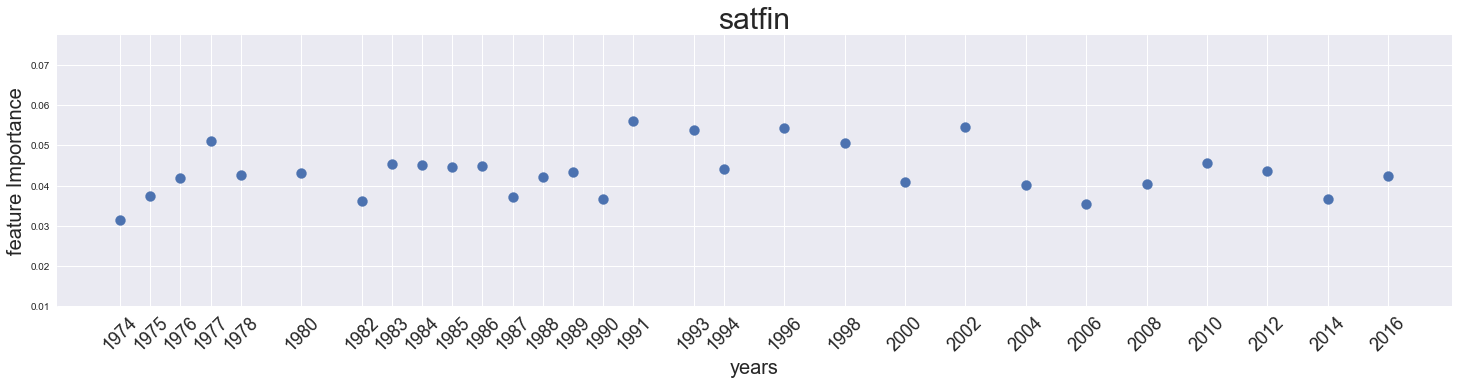

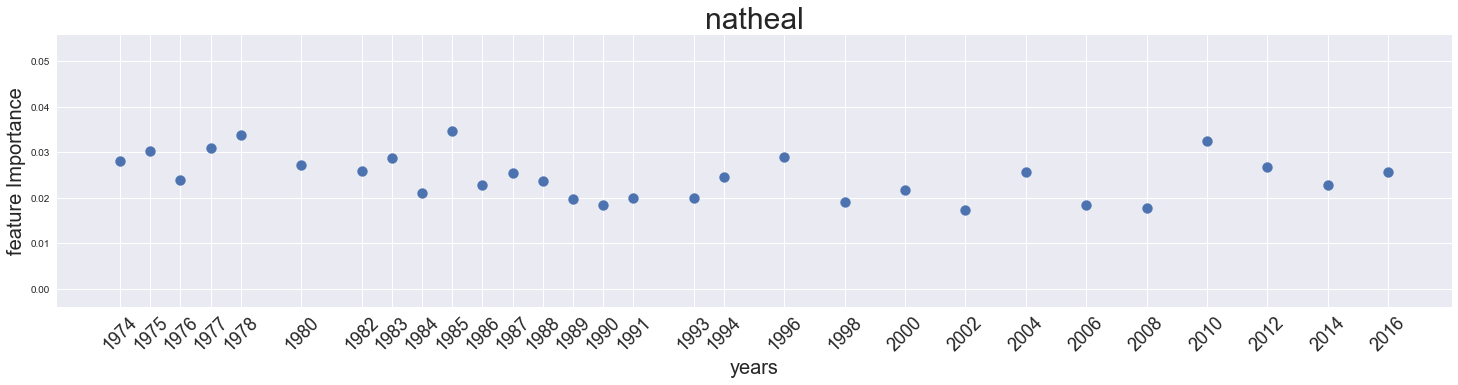

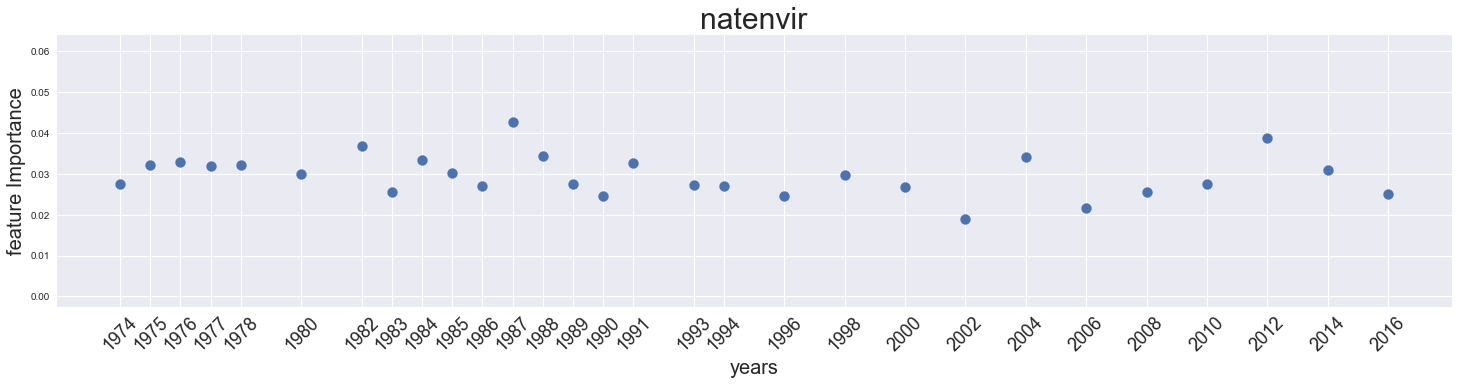

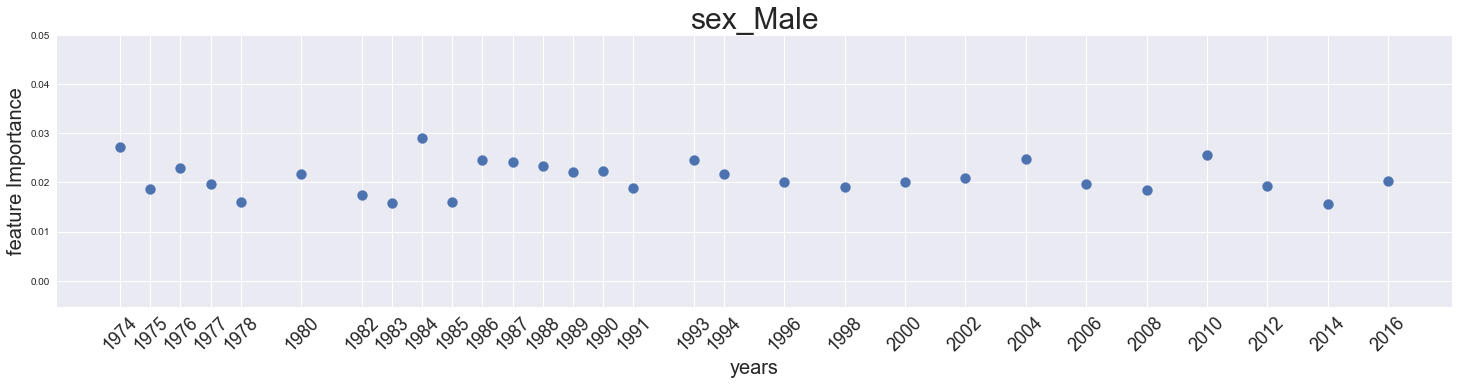

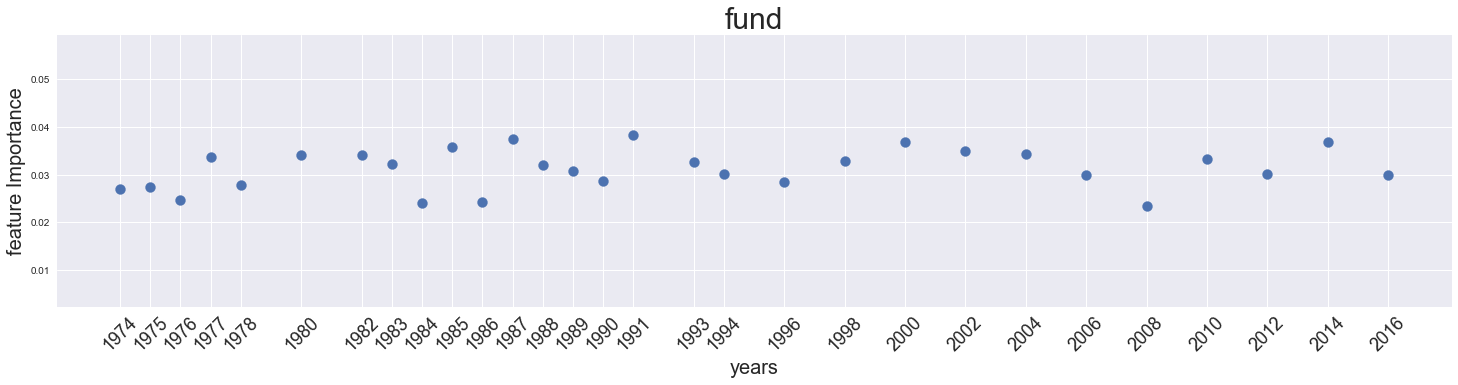

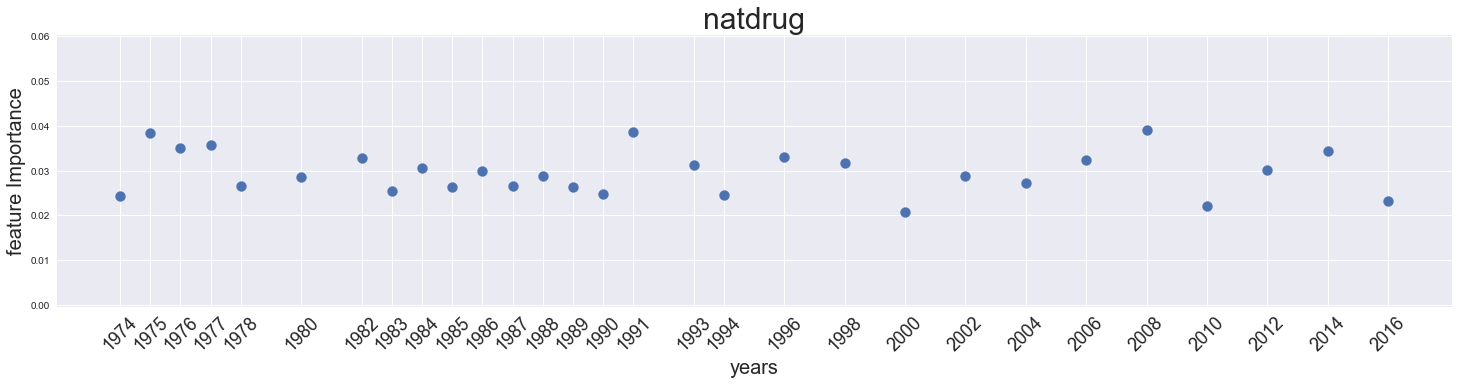

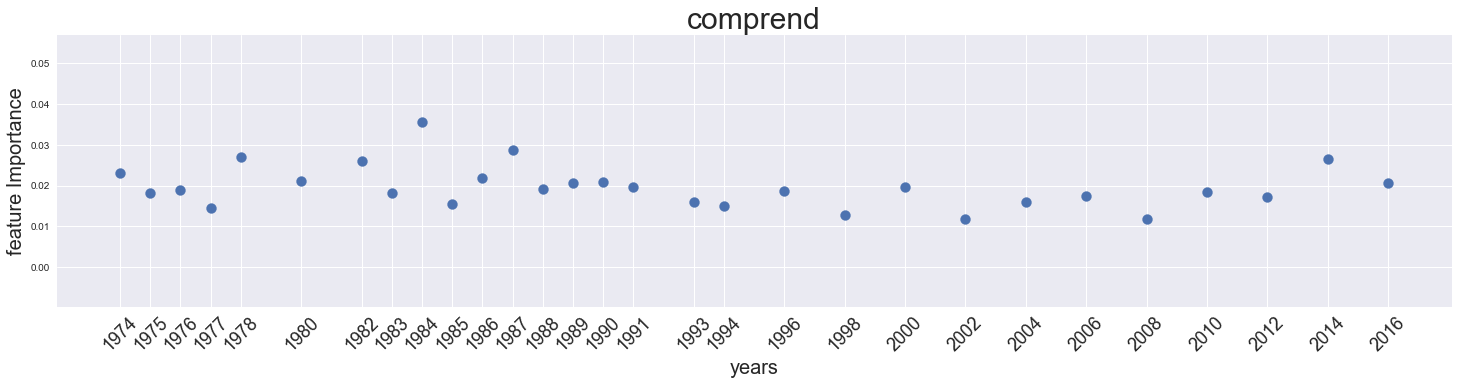

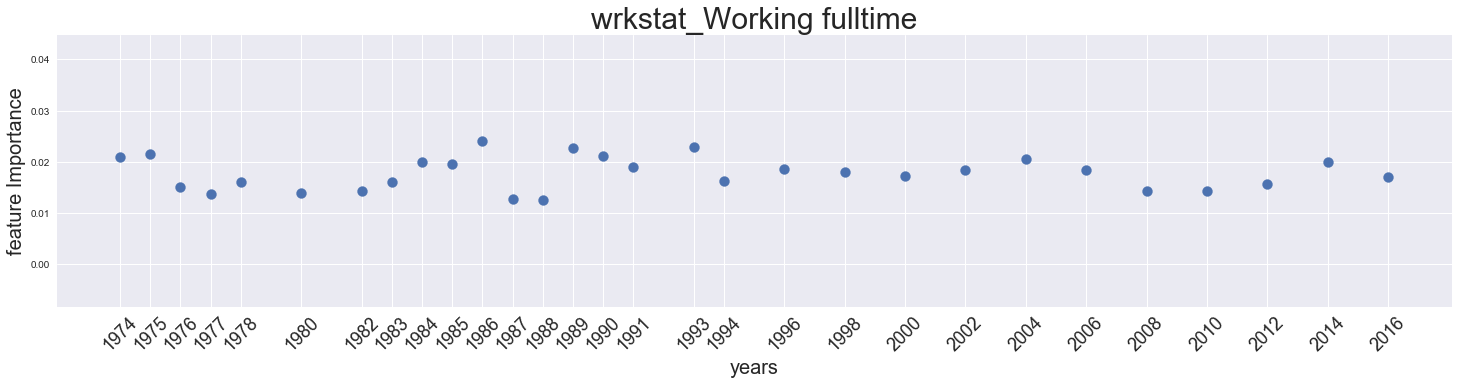

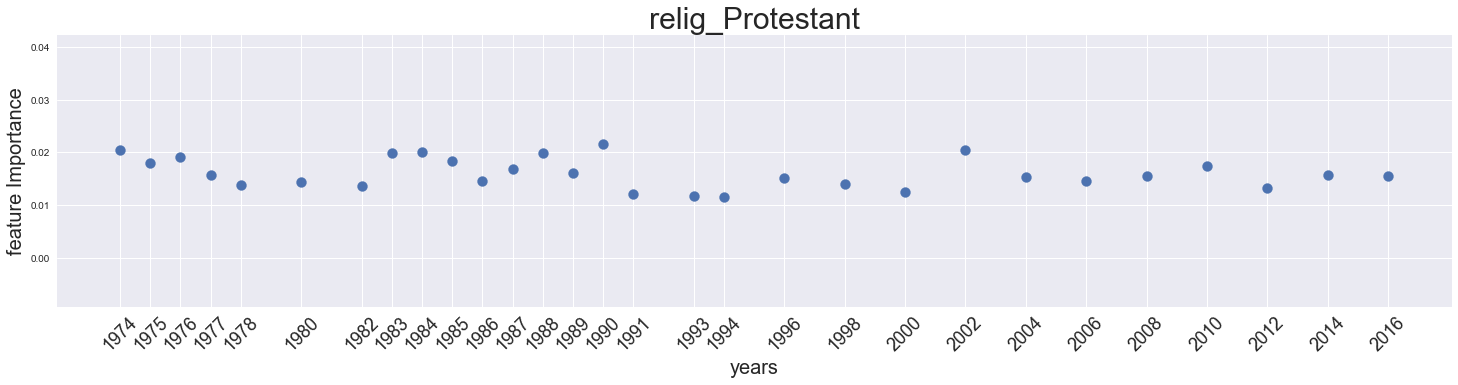

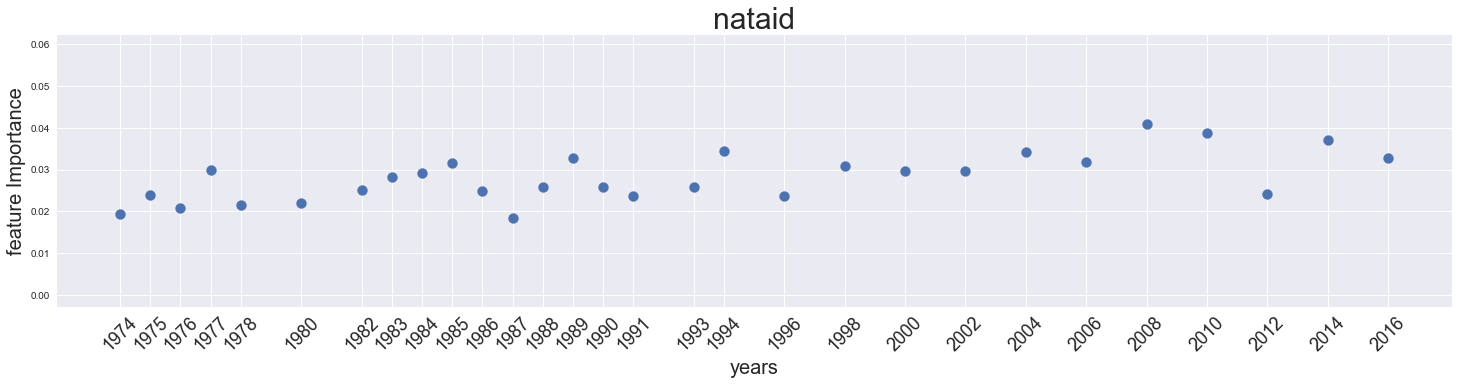

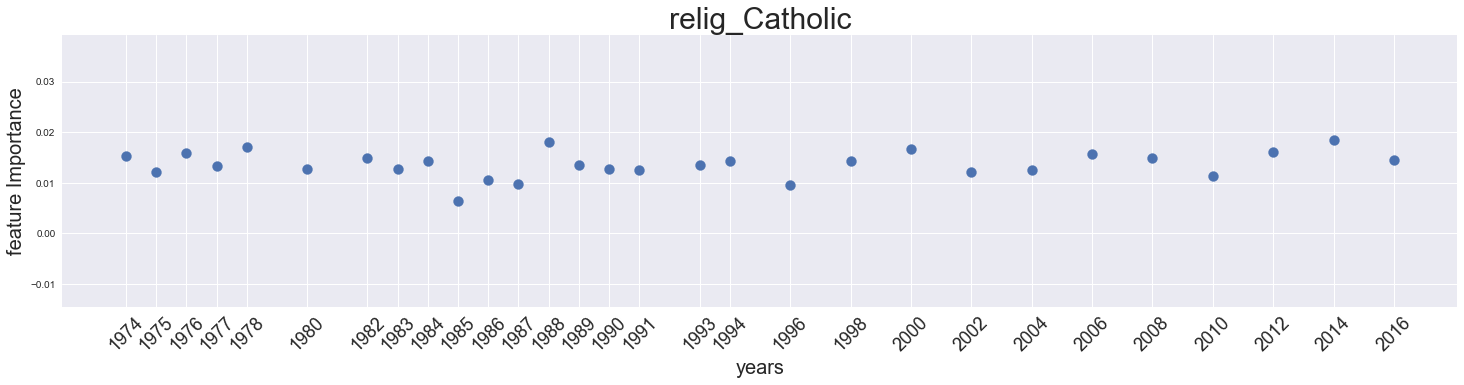

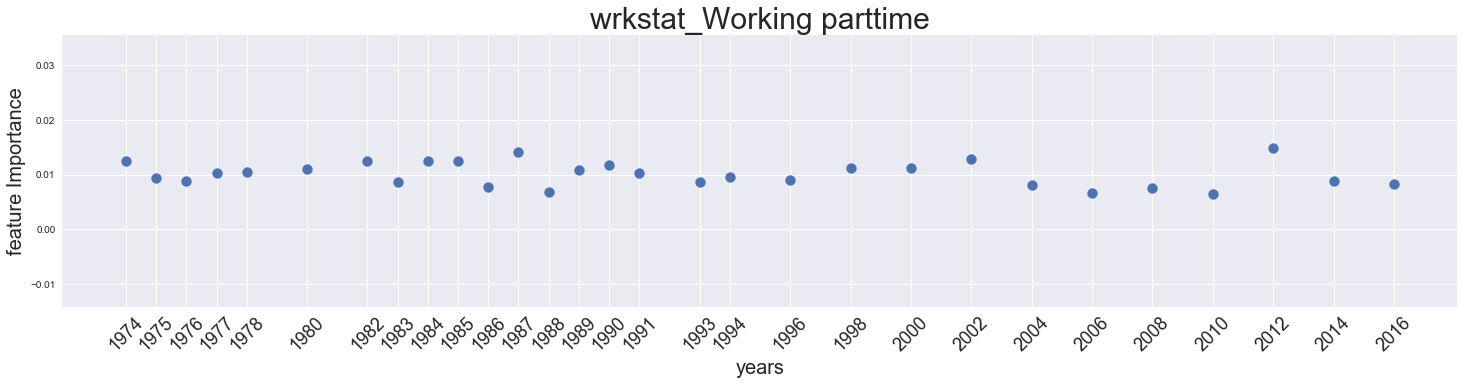

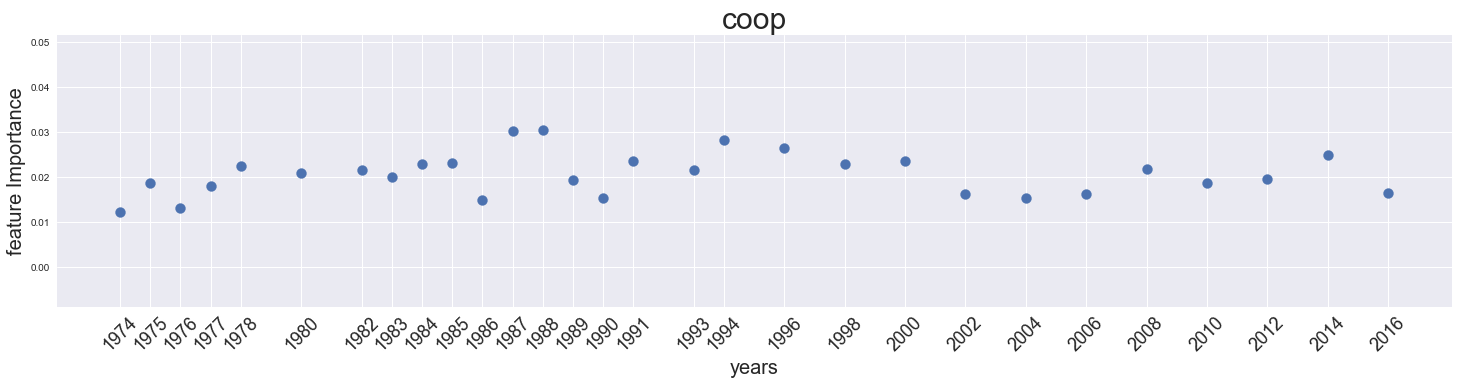

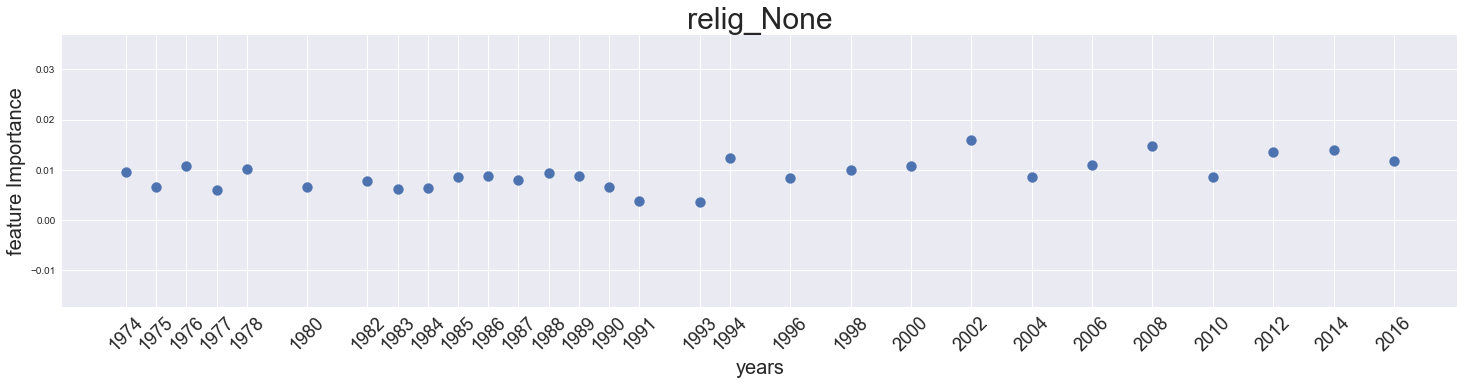

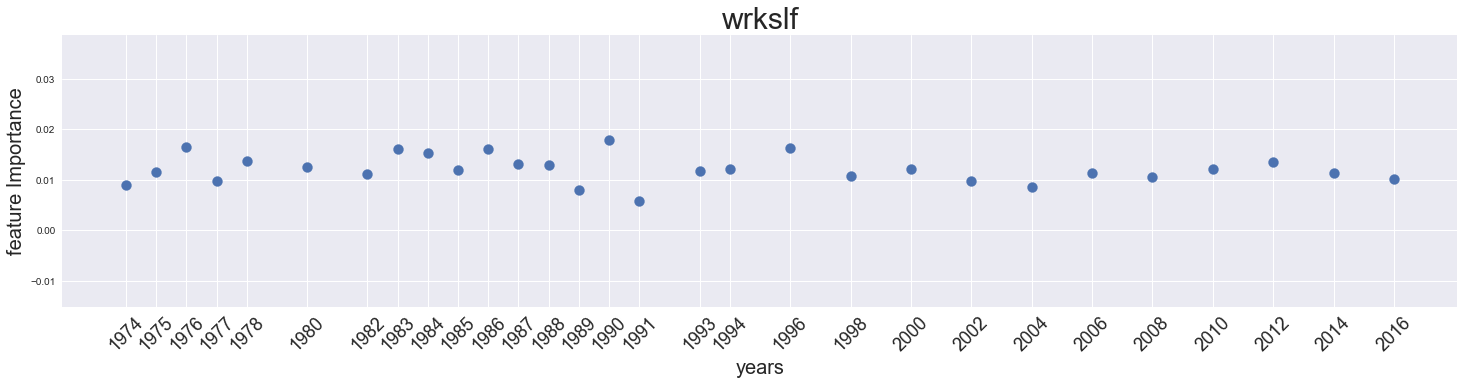

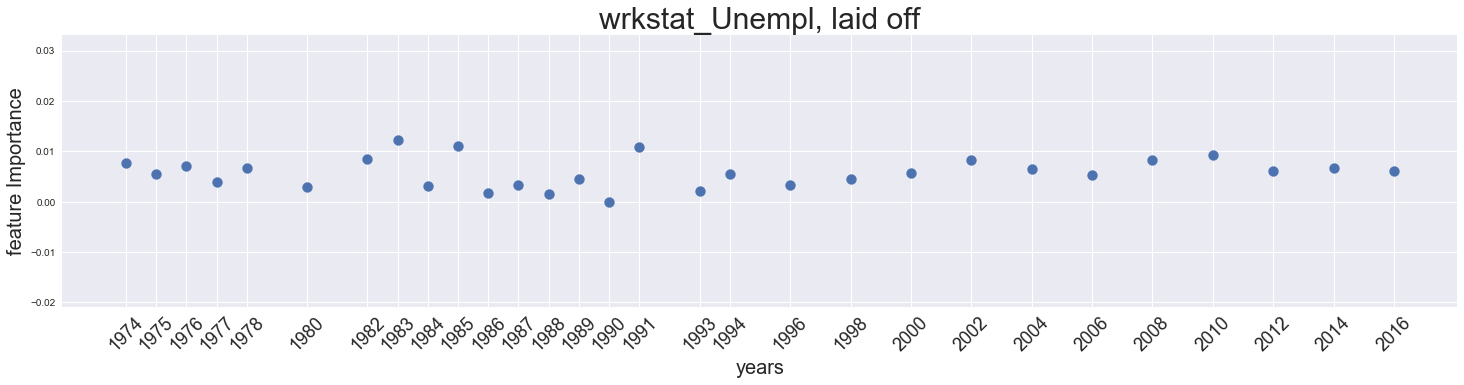

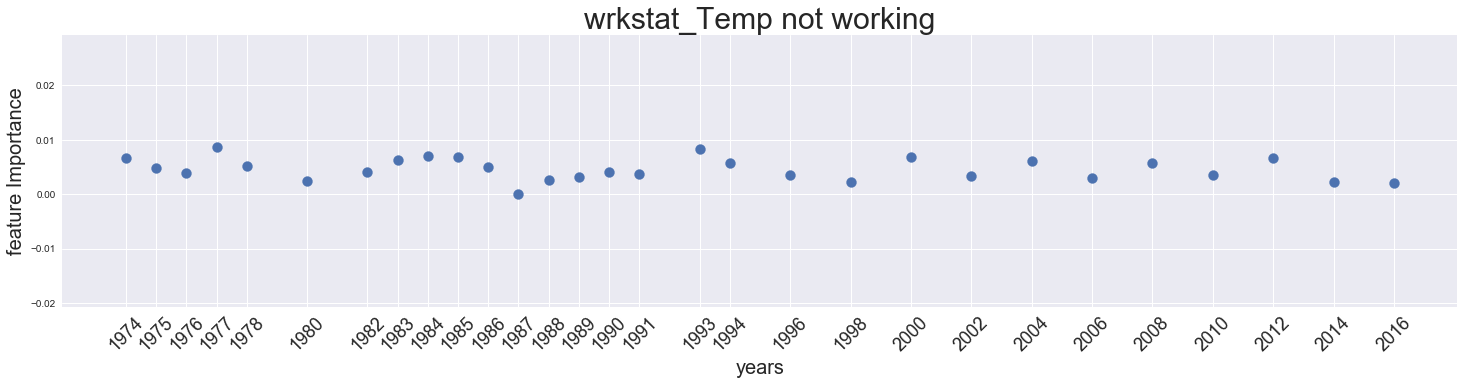

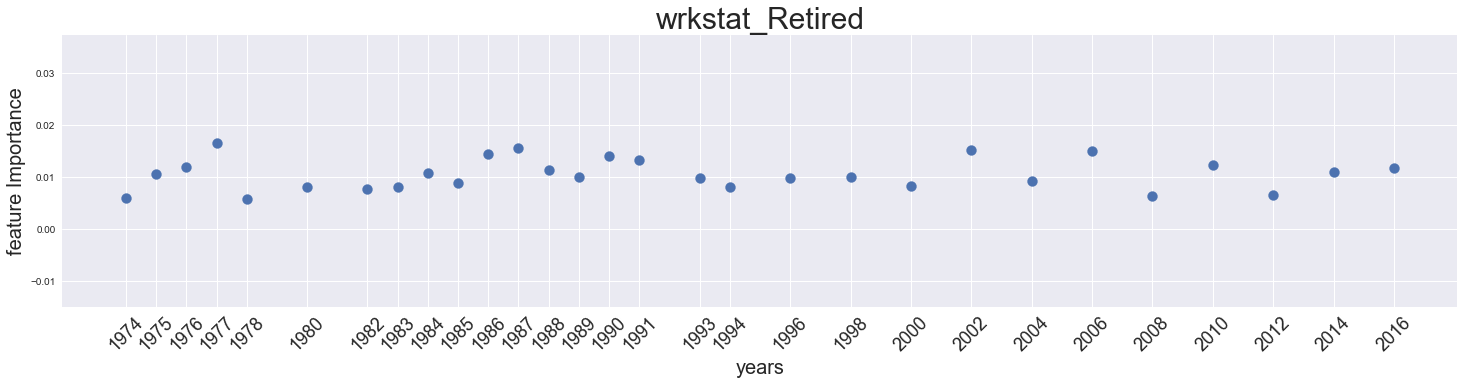

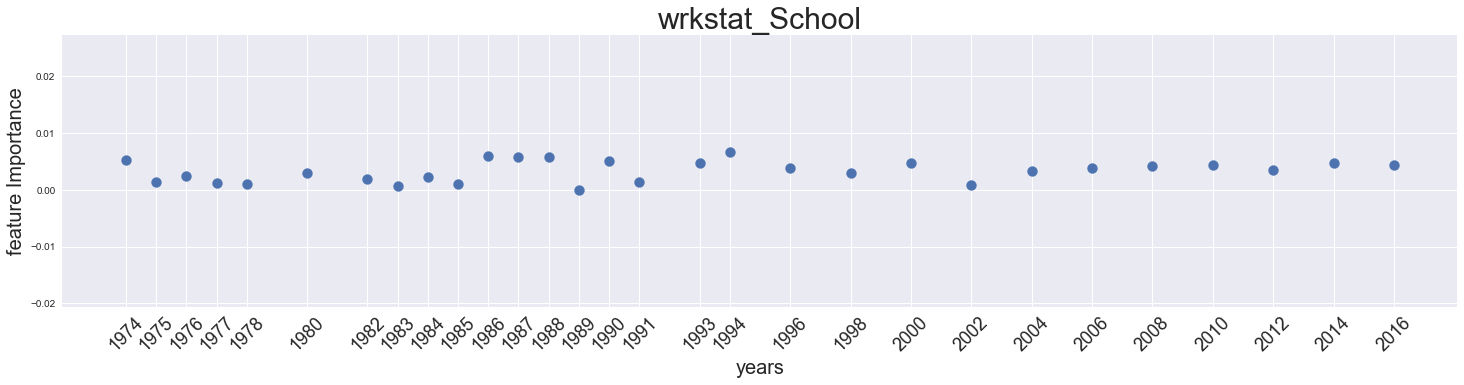

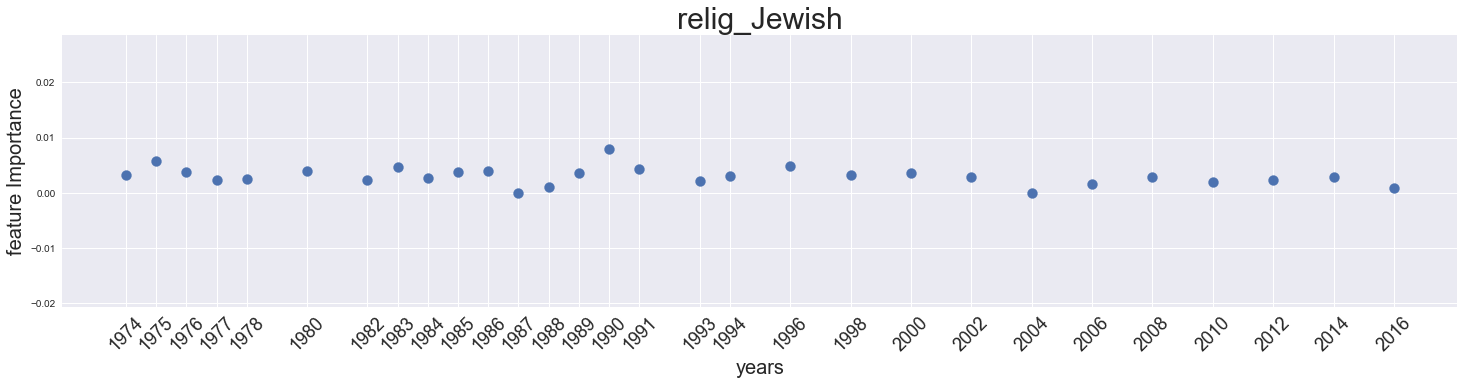

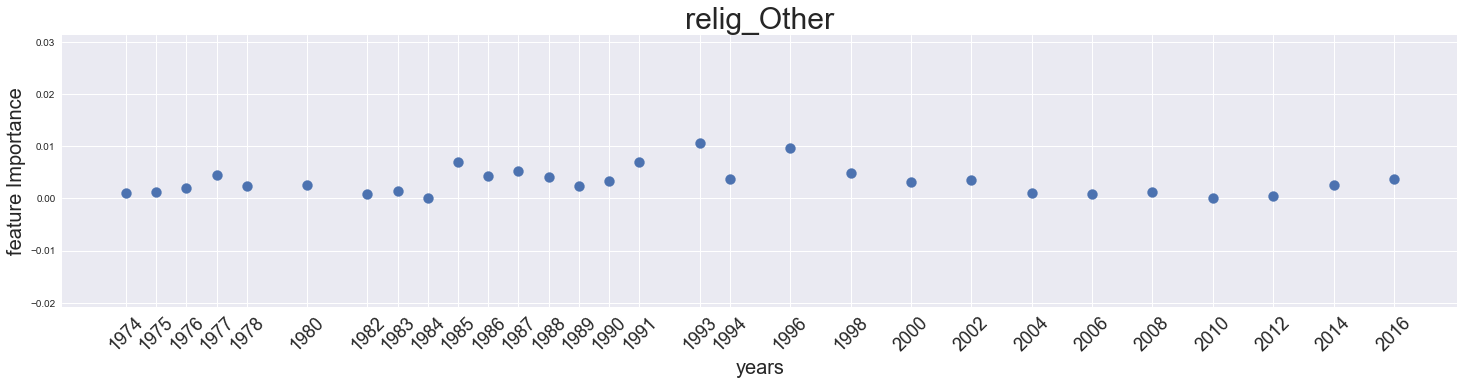

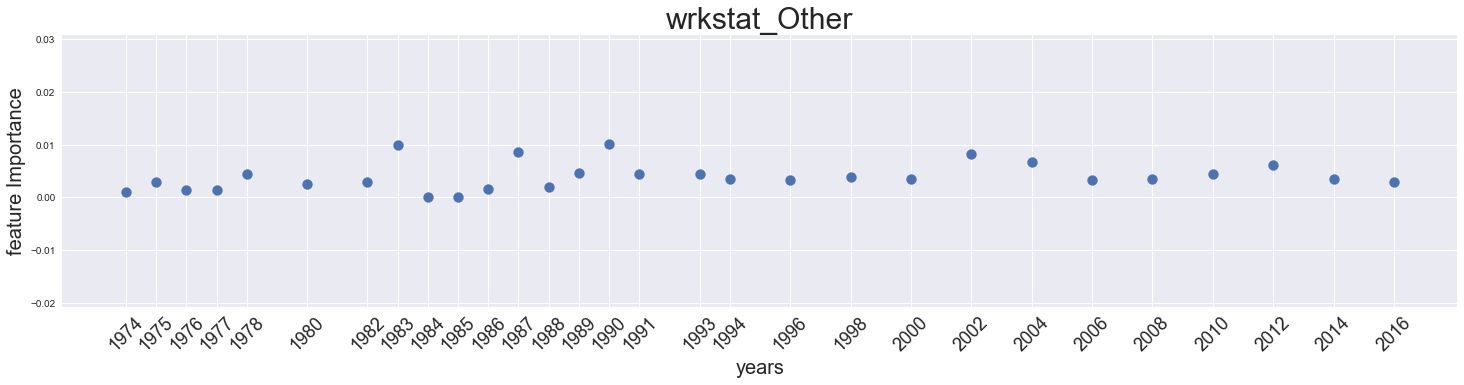

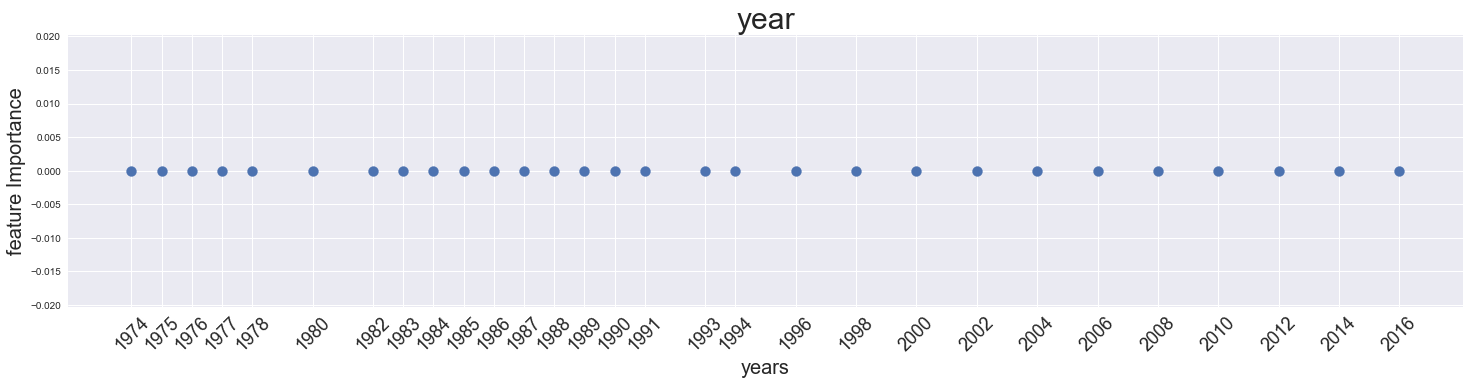

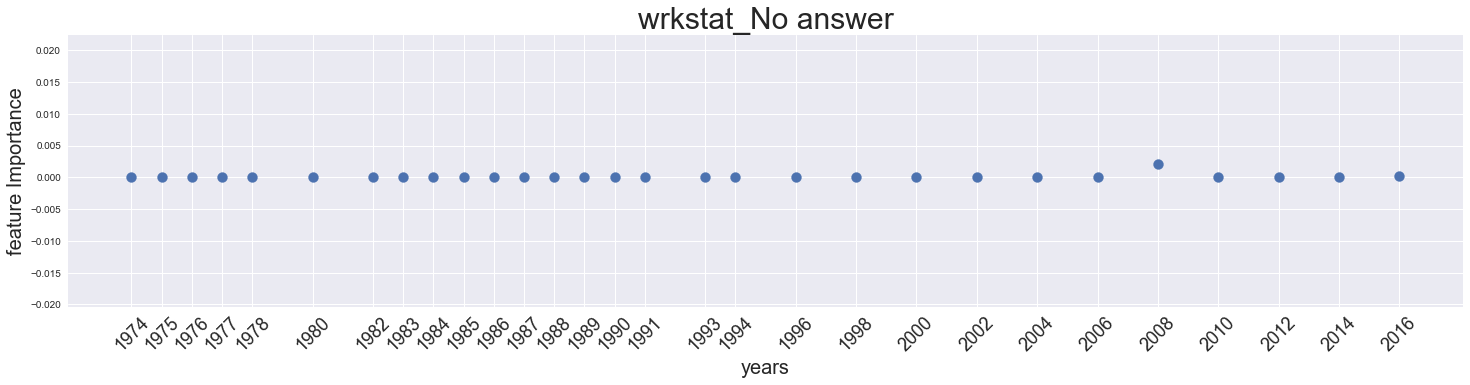

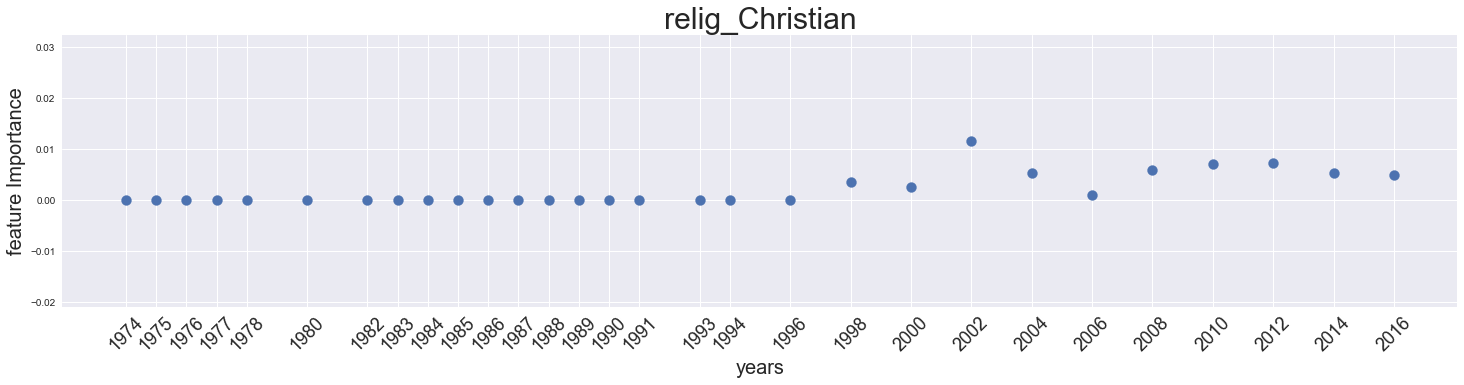

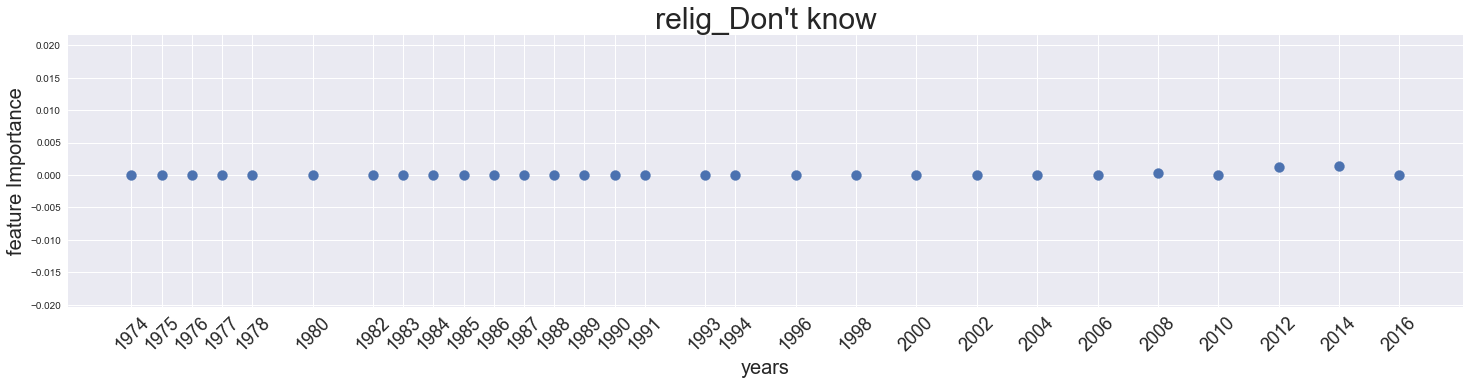

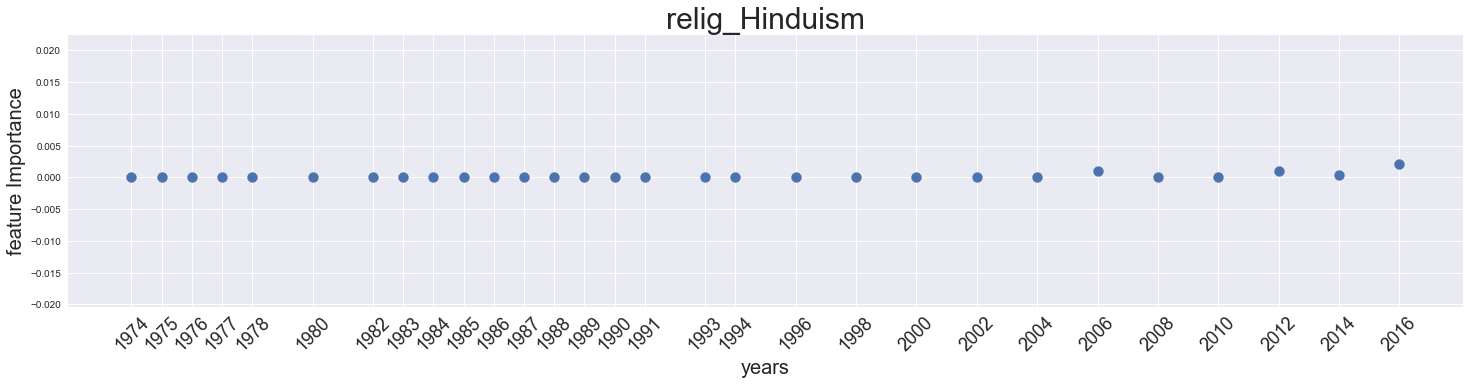

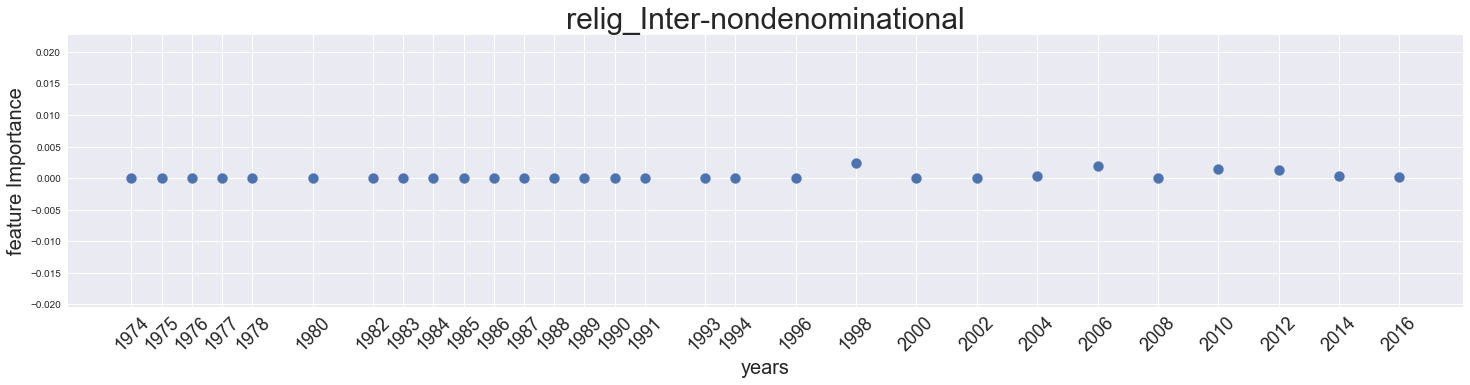

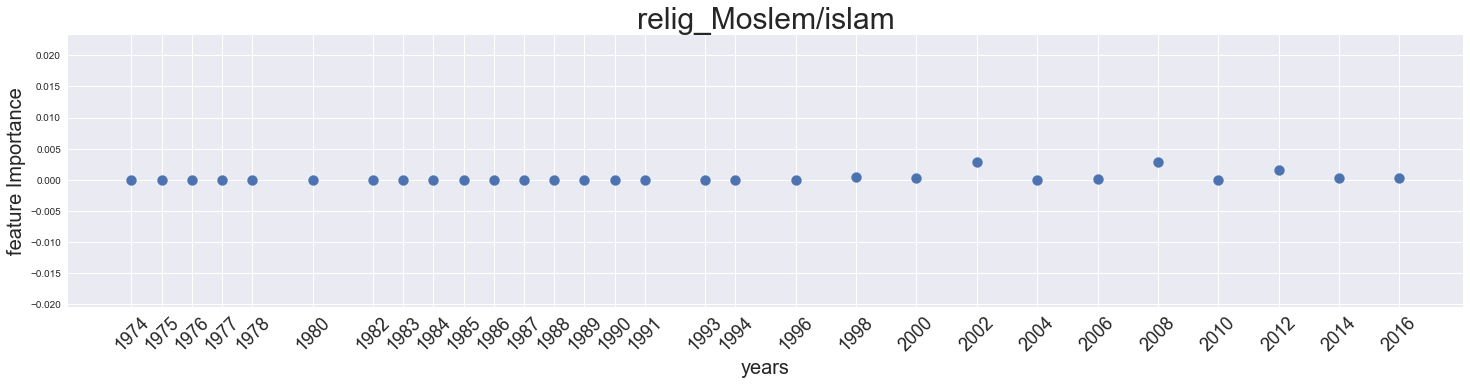

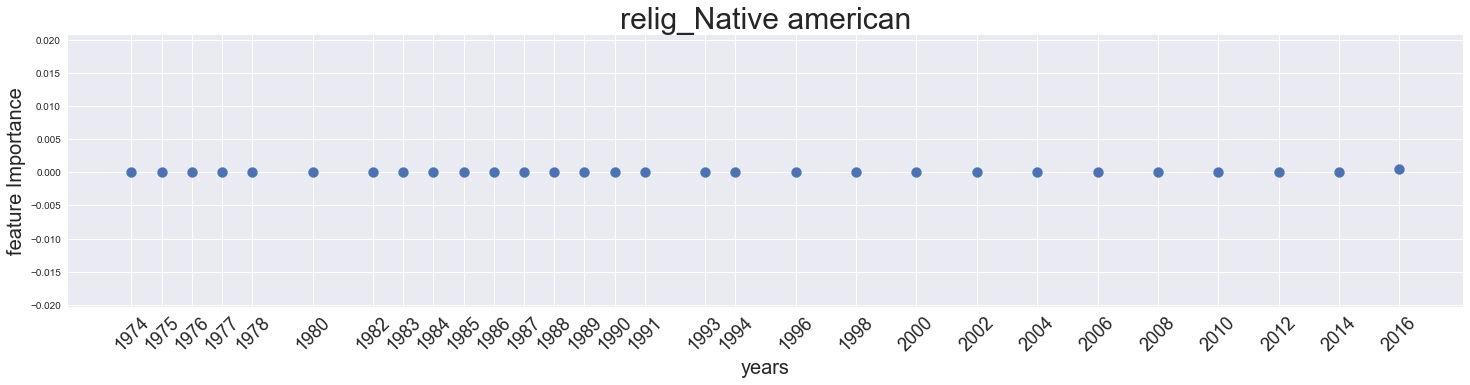

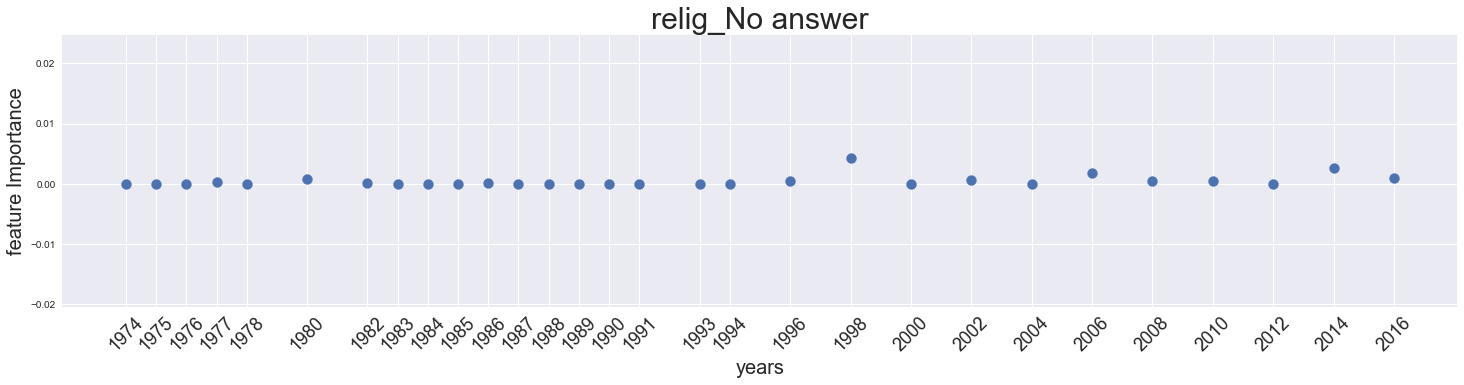

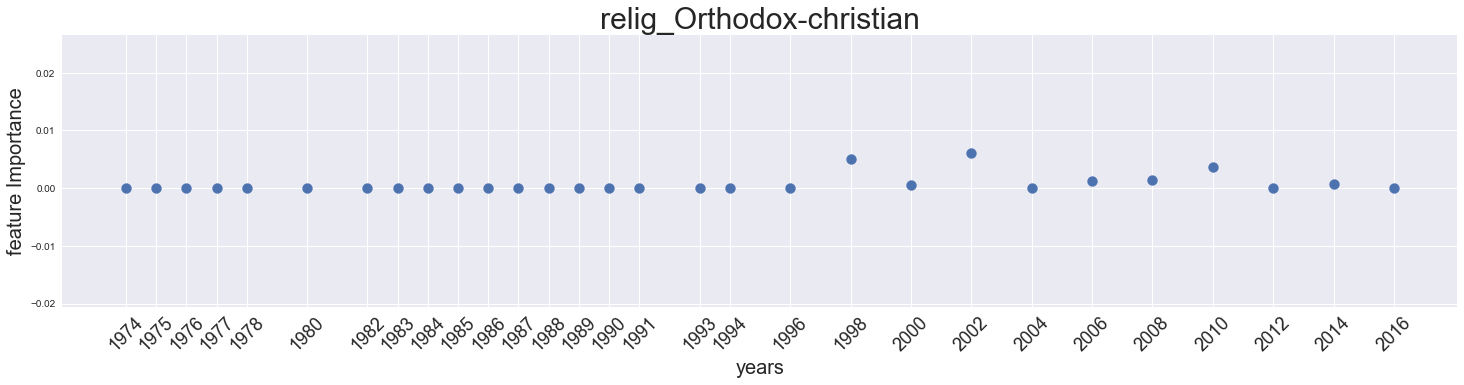

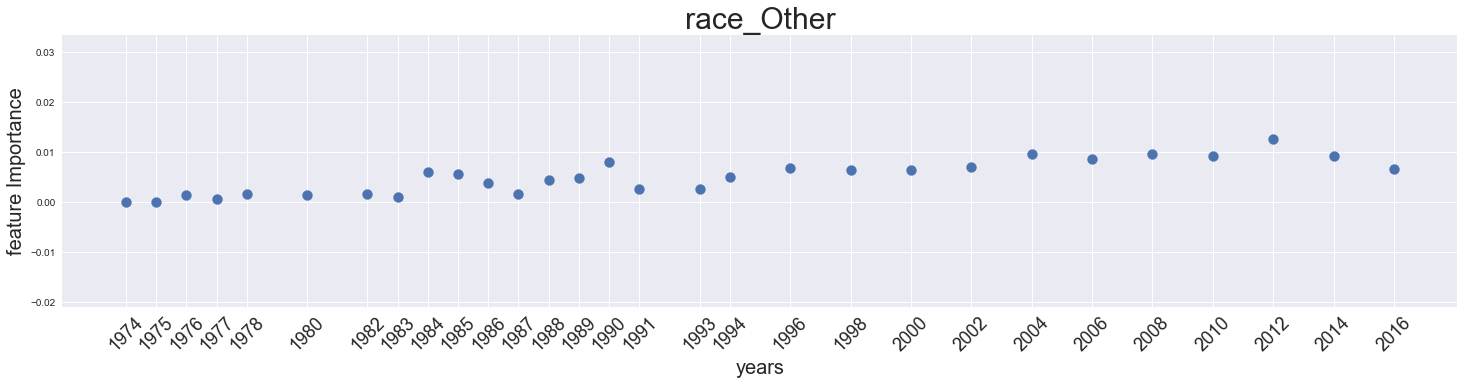

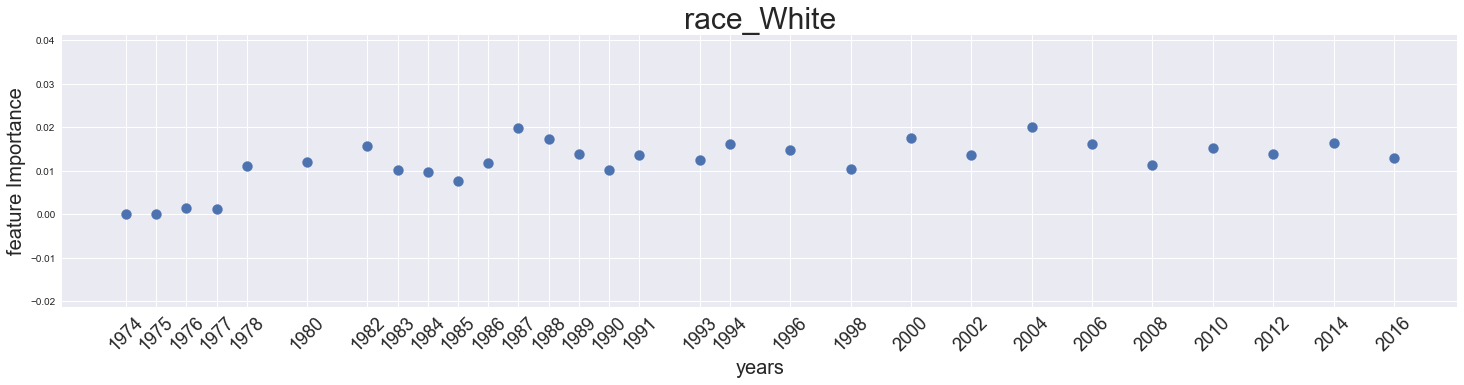

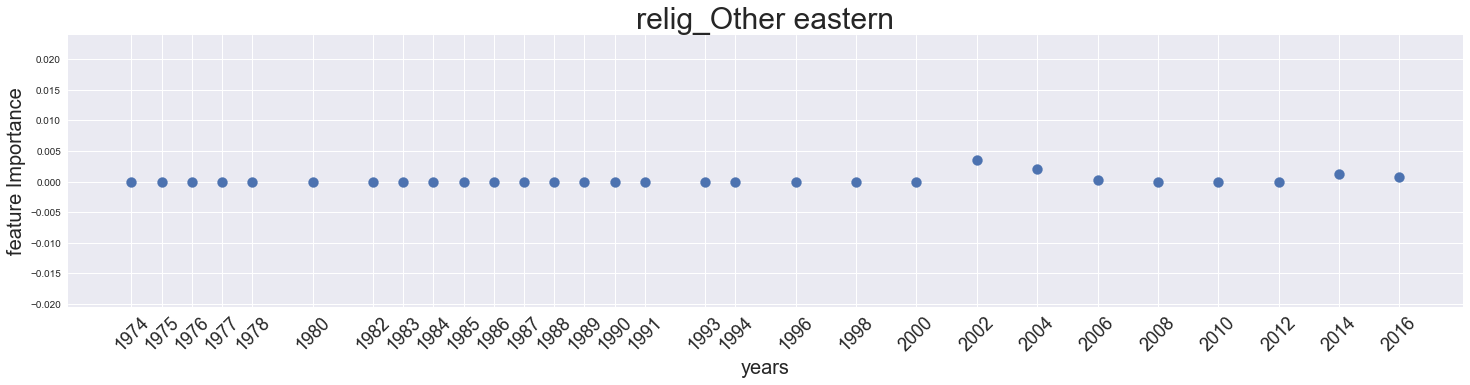

In [24]:
years = [1974, 1975, 1976, 1977, 1978, 1980, 1982, 1983, 1984, 1985, 1986, 1987, 1988,1989,
 1990, 1991, 1993, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016]

def feature_trends(feature):
    trend_list = []
    for x in feat_by_year[feature]:
        for k,v in x.items():
            trend_list.append(v)
    return trend_list

def all_trends(features_dict):
    feat_list = defaultdict()
    for k,v in features_dict.items():
        for i in v:
            feat_list[i[0]] = i[1]
    for index, i in enumerate(feat_list):
        plt.figure(figsize=(25, 5));
        plt.scatter(years, feature_trends(i),s=100);
        plt.title(i, fontsize = 30);
        plt.xlabel('years', fontsize = 20);
        plt.ylabel('feature Importance', fontsize = 20);
        plt.xticks([x for x in years], years, fontsize = 18, rotation = 45);
        plt.show();
        
            
all_trends(features_dict);

In [25]:
pd.set_option('display.precision', 6)

X_train_log = X_train_up
X_train_log = X_train_log.astype('float64')
scaler = MinMaxScaler(feature_range=(0, 1))
sc1 = scaler.fit(X_train_log.astype('float64'))
X_train_log = pd.DataFrame(sc1.transform(X_train_log), columns = X_train_log.columns)

X_test_log = X_test_up
X_test_log = X_test_log.astype('float64')
scaler = MinMaxScaler(feature_range=(0, 1))
sc2 = scaler.fit(X_test_log.astype('float64'))
X_test_log = pd.DataFrame(sc2.transform(X_test_log), columns = X_test_log.columns)

In [26]:
def train_fit(X_train_log, X_test_log, y_train_up, y_test_up,c):
    Lr = LogisticRegression(penalty = 'l1', dual=False, tol=0.0001, C=c, fit_intercept=True, intercept_scaling=1)
    Lr.fit(X_train_up, y_train_up)
    Lr_test_pred = Lr.predict(X_test_log)
    Lr_train_pred = Lr.predict(X_train_log)
    print(accuracy_score(y_test_up,Lr_test_pred),accuracy_score(y_train_up, Lr_train_pred),classification_report(y_test_up, Lr_test_pred))
    
train_fit(X_train_log, X_test_log, y_train_up, y_test_up,16)

0.329767865271 0.467377177021              precision    recall  f1-score   support

          1       0.37      0.83      0.51      2749
          2       0.64      0.01      0.02      5019
          3       0.23      0.56      0.33      1020

avg / total       0.51      0.33      0.21      8788



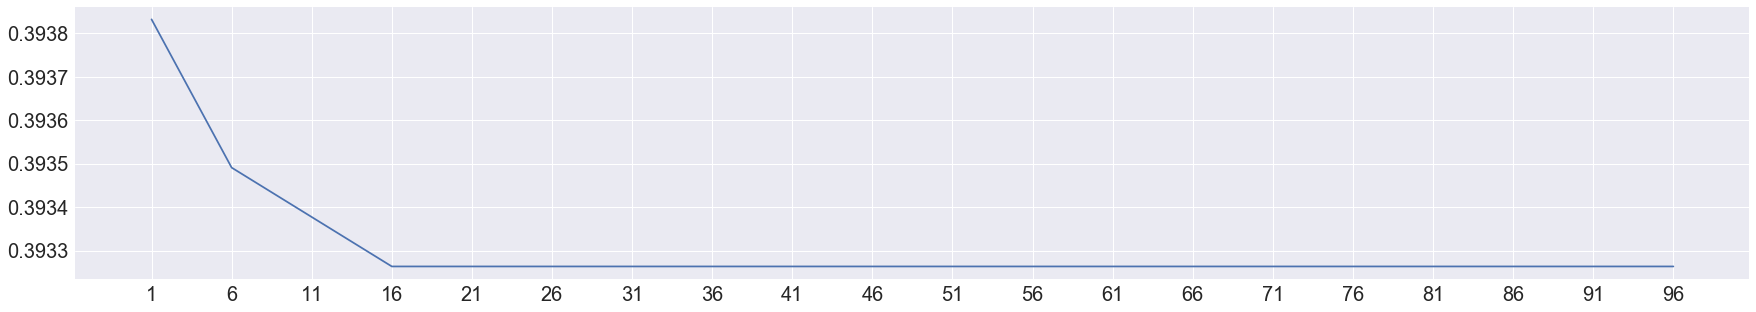

In [27]:
def train_fit(X_train_log, X_test_log, y_train_up, y_test_up,c):
    Lr = LogisticRegression(penalty = 'l1', dual=False, tol=0.0001, C=c, fit_intercept=True, intercept_scaling=1)
    Lr.fit(X_train_log, y_train_up)
    Lr_test_pred = Lr.predict(X_test_log)
    Lr_train_pred = Lr.predict(X_train_log)
    return accuracy_score(y_test_up,Lr_test_pred),accuracy_score(y_train_up, Lr_train_pred)

def log_iter(C):
    y_list_log = []
    for c in range(1,C,5):
        y_list_log.append(train_fit(X_train_log, X_test_log, y_train_up, y_test_up,c))
    
    plt.figure(figsize = (30,5));
    plt.plot([x for x in range(0,20)], [float(x[0]) for x in y_list_log]);
    plt.xticks([x for x in range(0,20)],[c for c in range(1,101,5)],fontsize = 20);
    plt.yticks(fontsize = 20);
    plt.show();
    
log_iter(101)

In [28]:
GSS5_year = {k: v for k, v in GSS3.groupby('year')}

features_dict5 = {}
for k,v in GSS5_year.items():
    X = v[columns]
    y = v['happy'].astype('int')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)    
    lr = LogisticRegression(penalty = 'l1', dual=False, tol=0.0001, C=6, fit_intercept=True, intercept_scaling=1)
    fit = lr.fit(X_train, y_train)
    features=sorted(zip(X_train.columns, [abs(x) for x in fit.coef_[0]]),key = lambda x: x[1], reverse=True)
    features_dict5[k] = features

In [29]:
feat_by_year5 = defaultdict(list)

for k,v in features_dict5.items():
    for i,j in v:
        feat_by_year5[i].append({k:j})

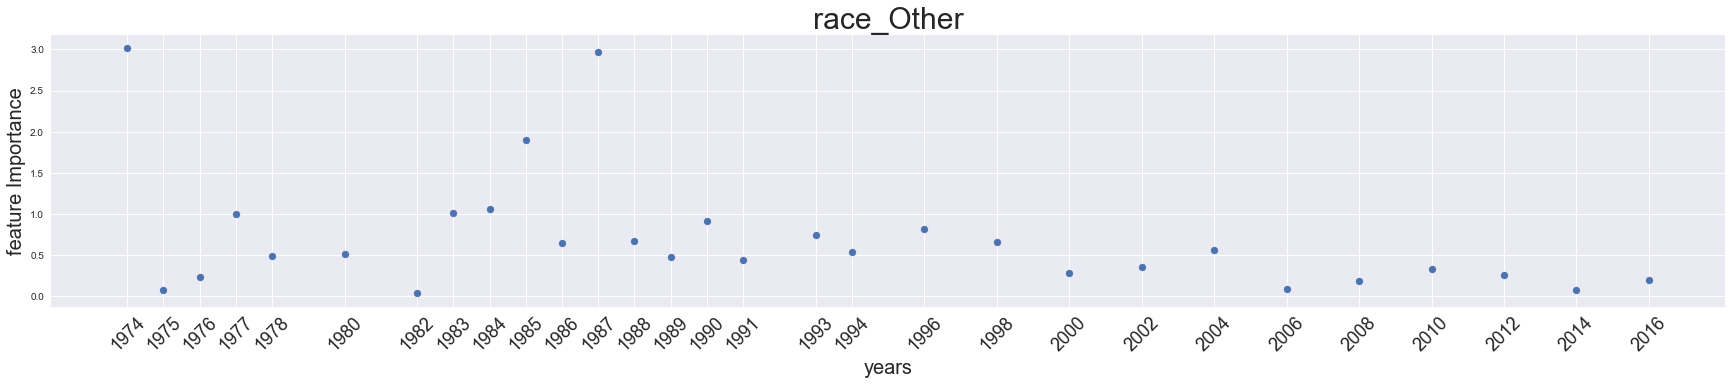

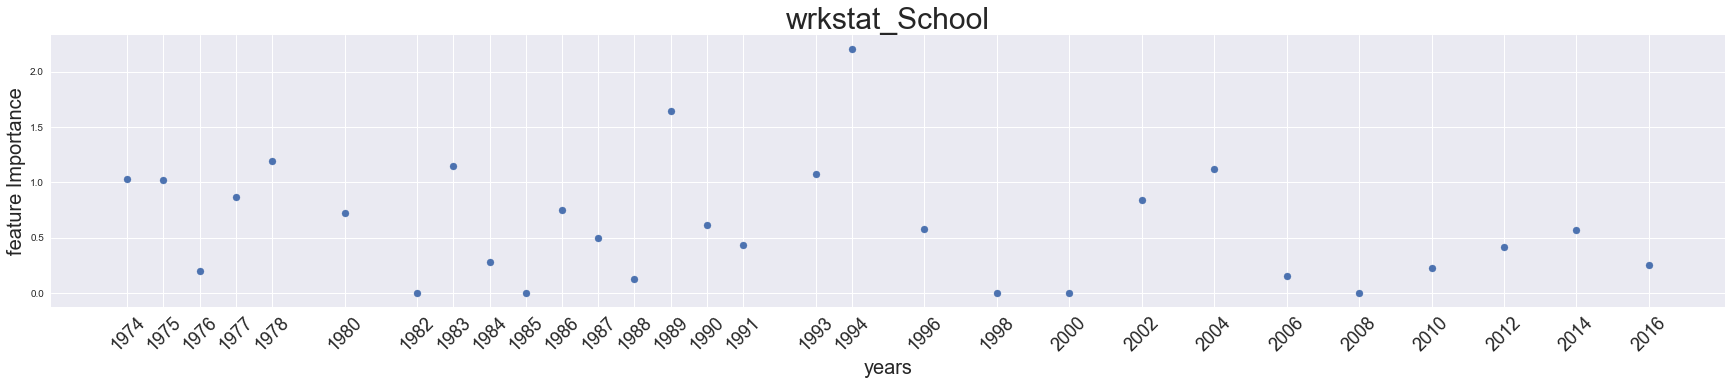

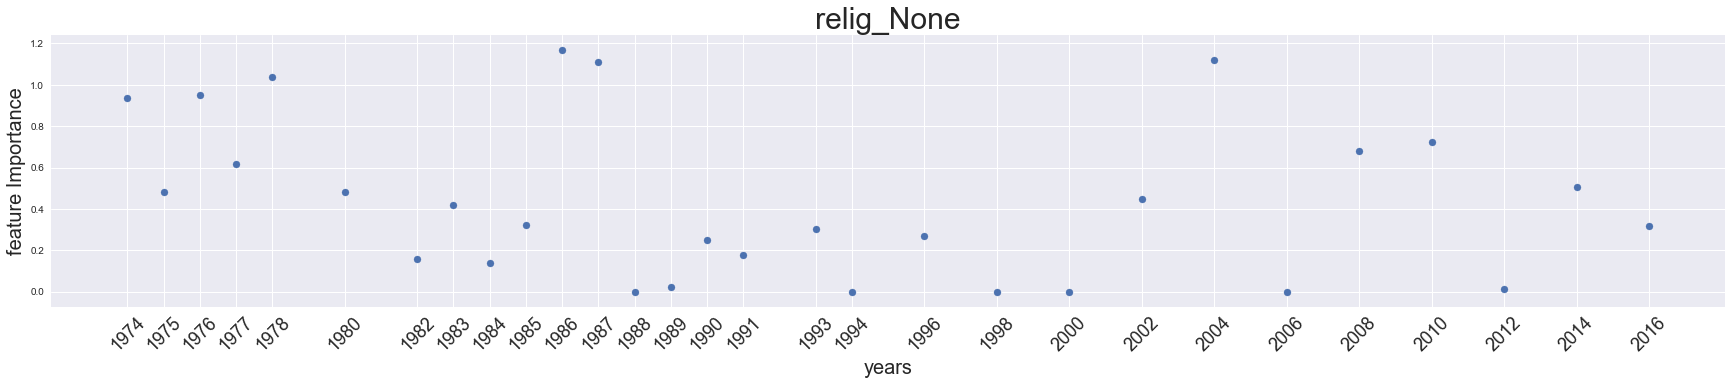

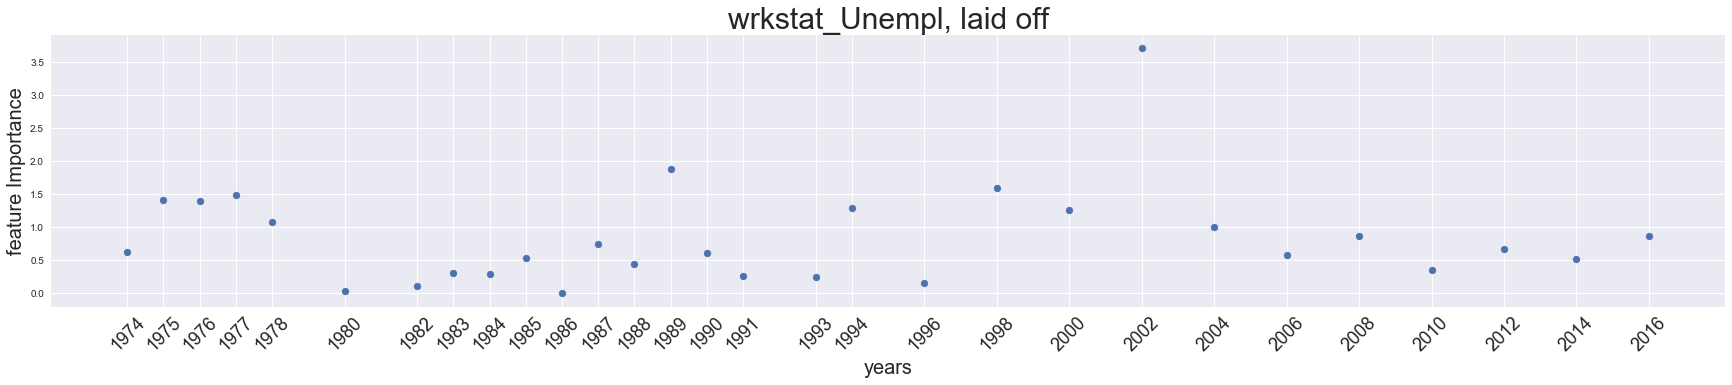

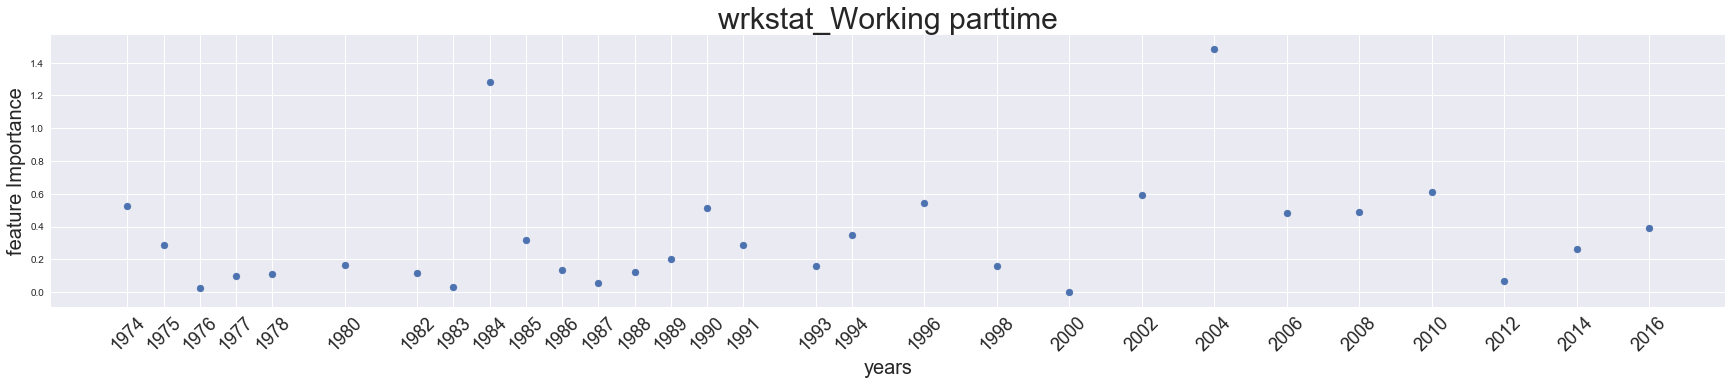

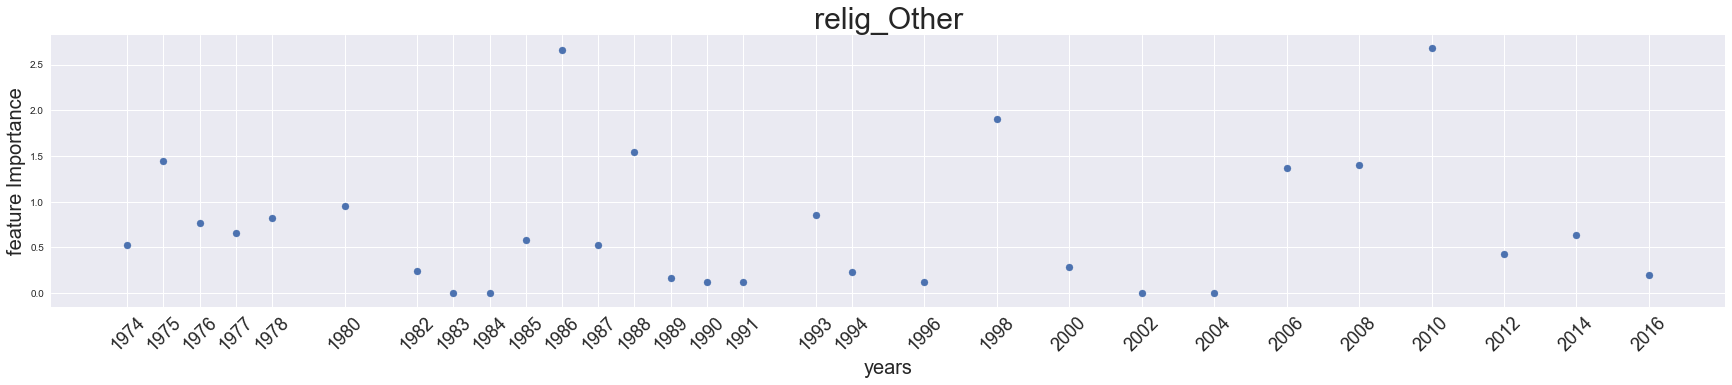

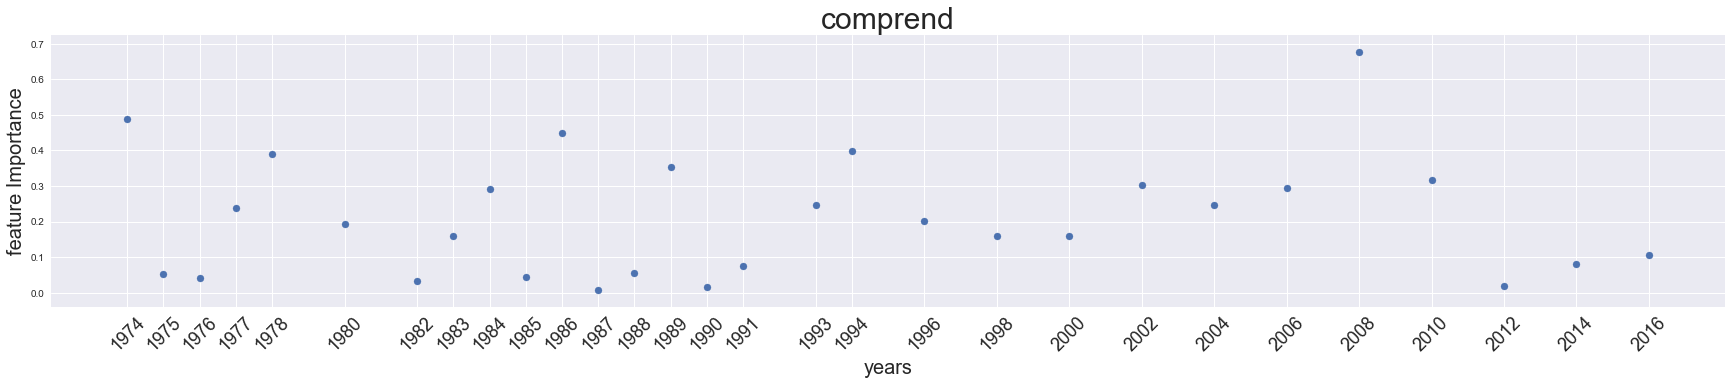

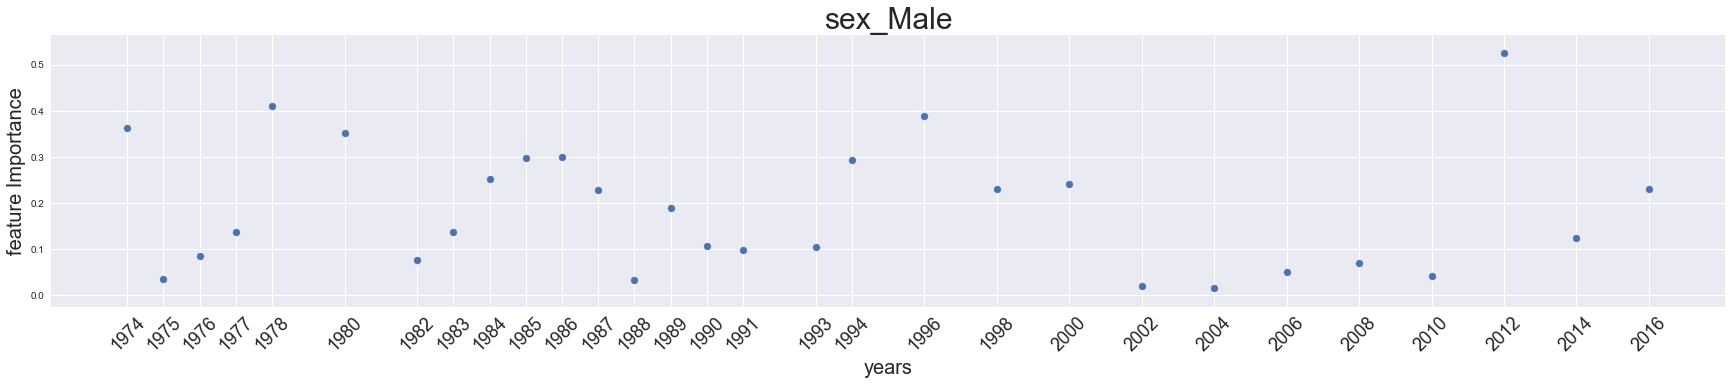

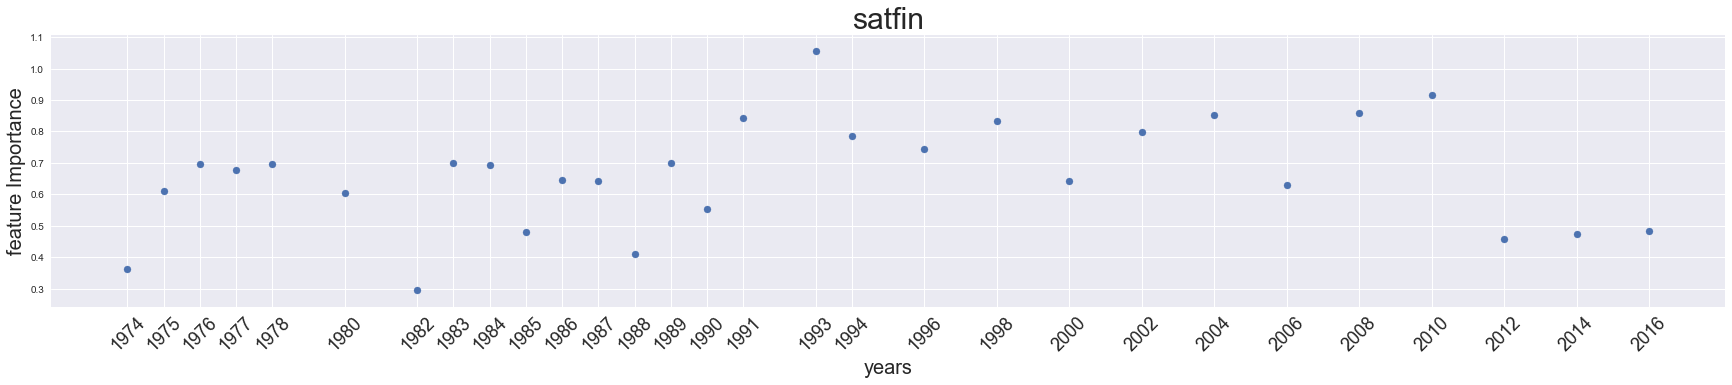

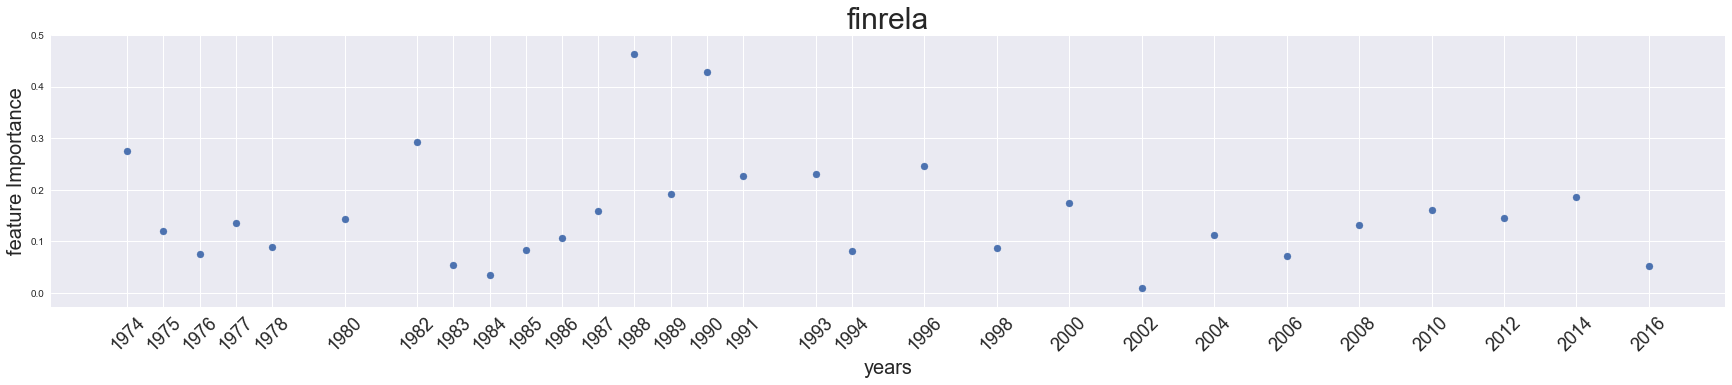

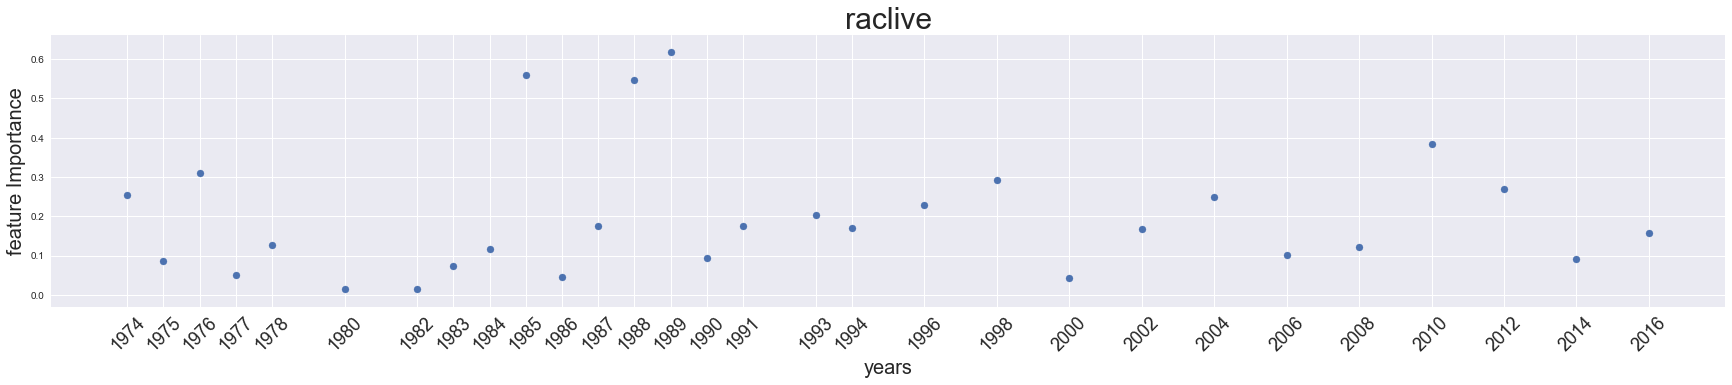

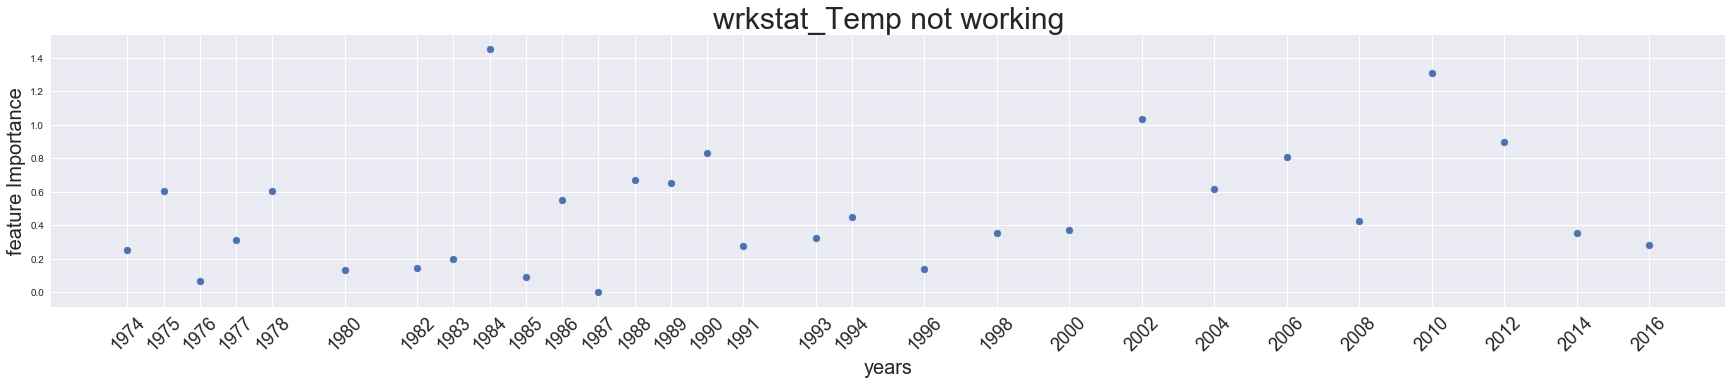

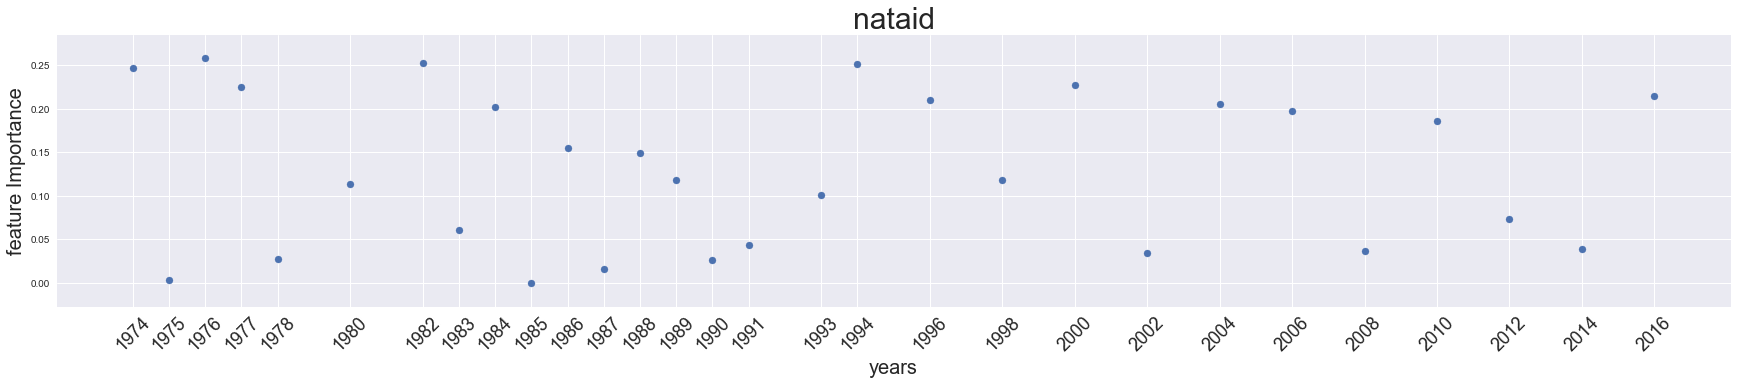

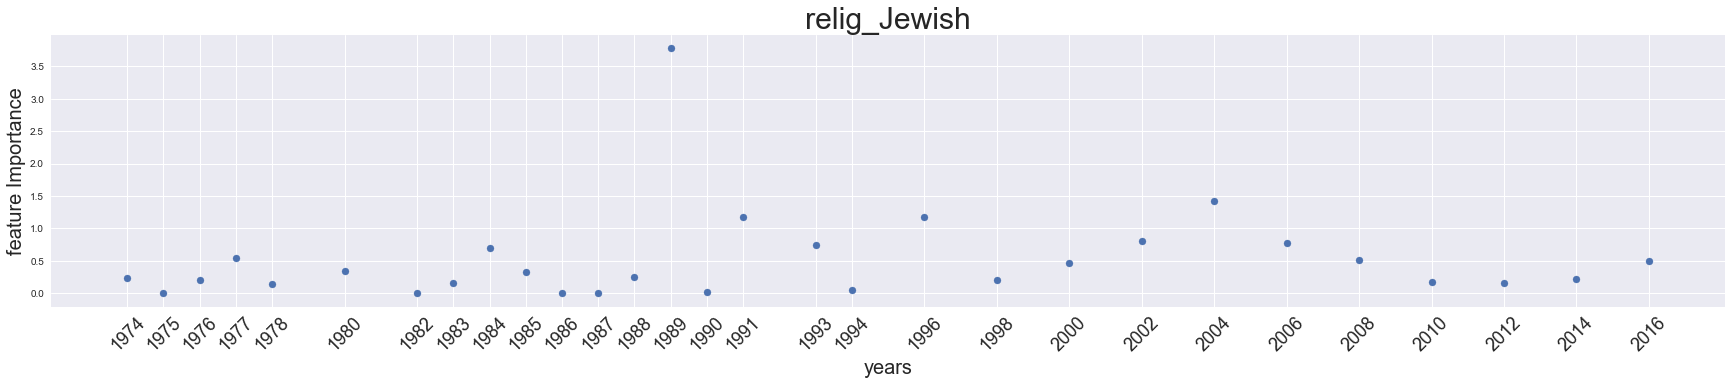

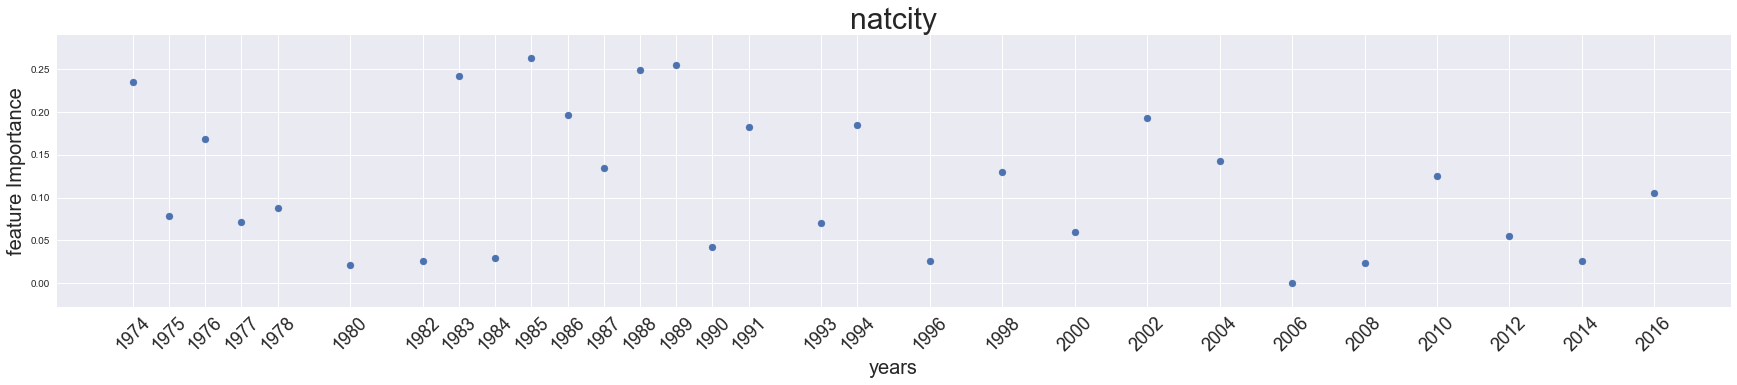

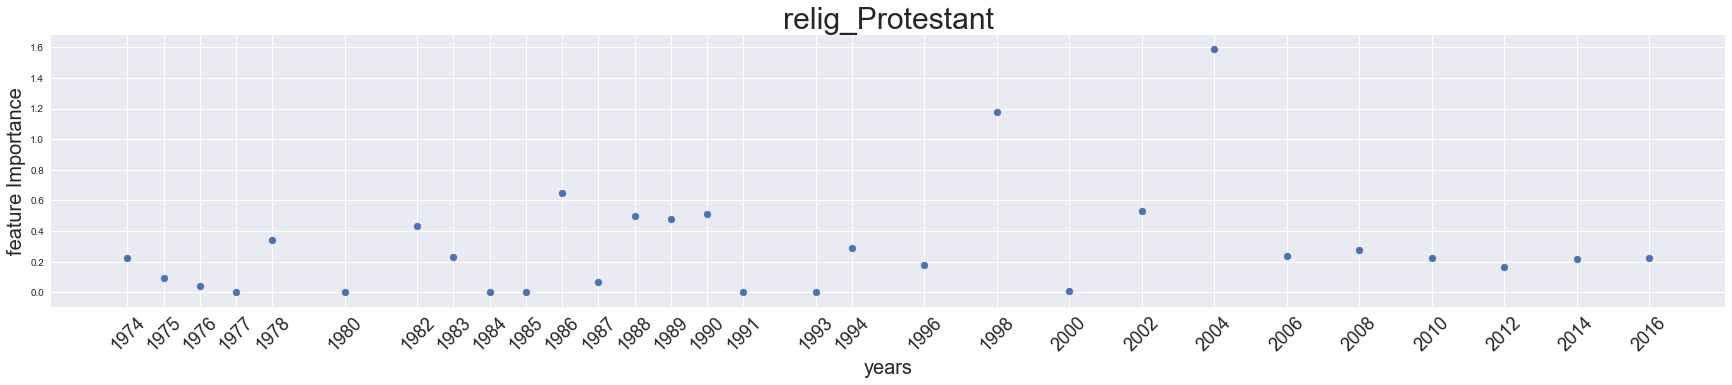

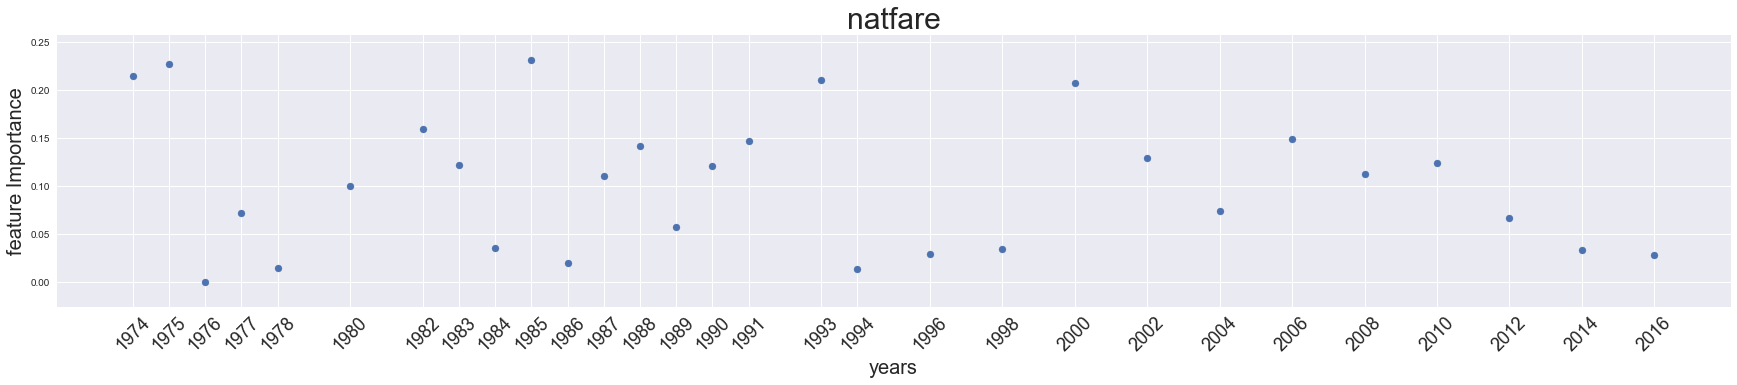

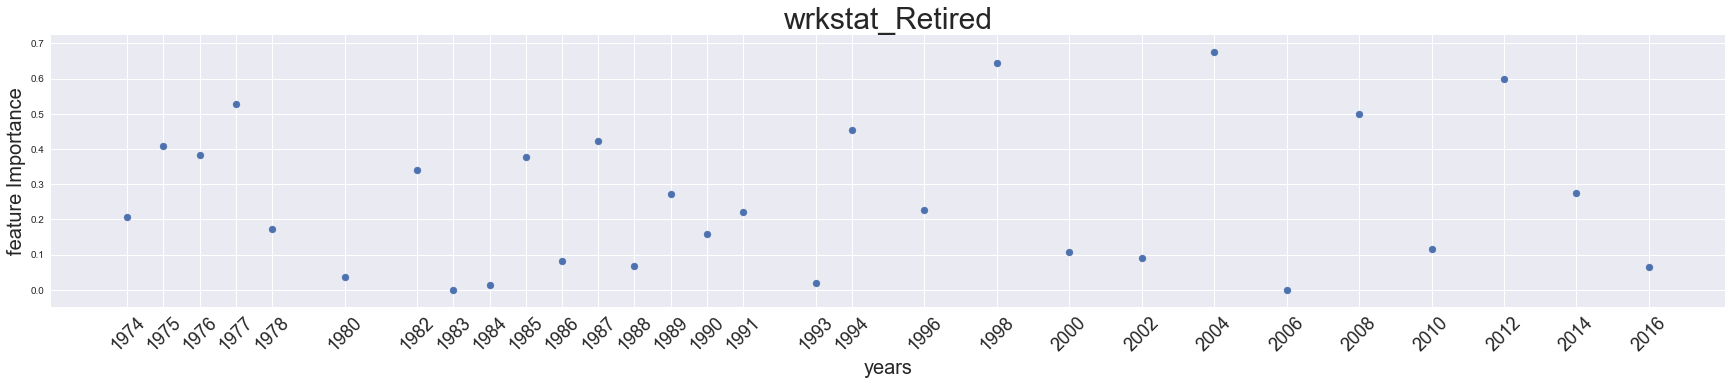

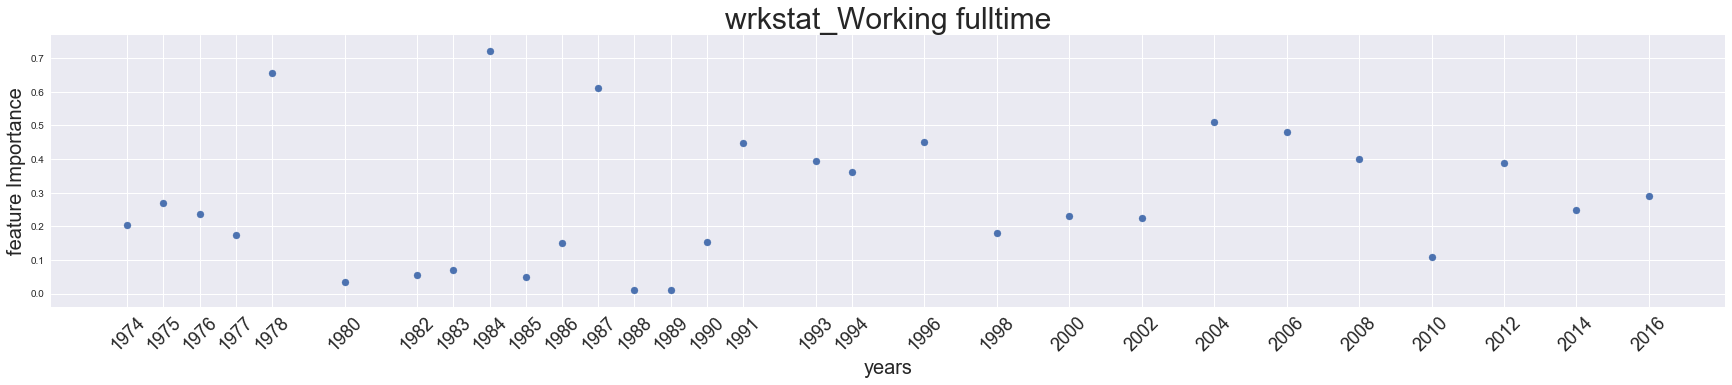

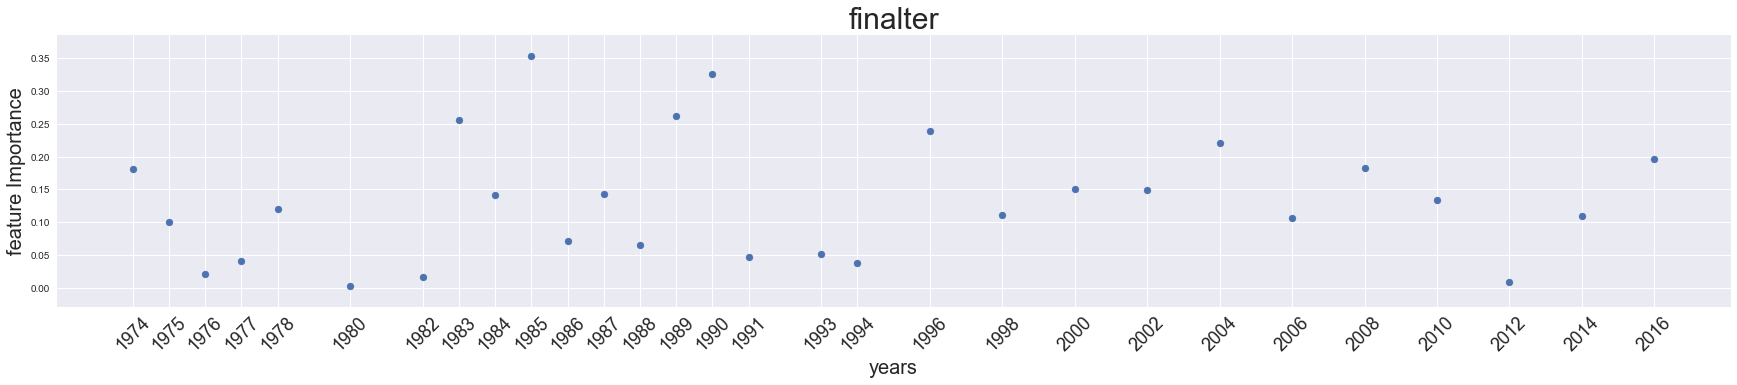

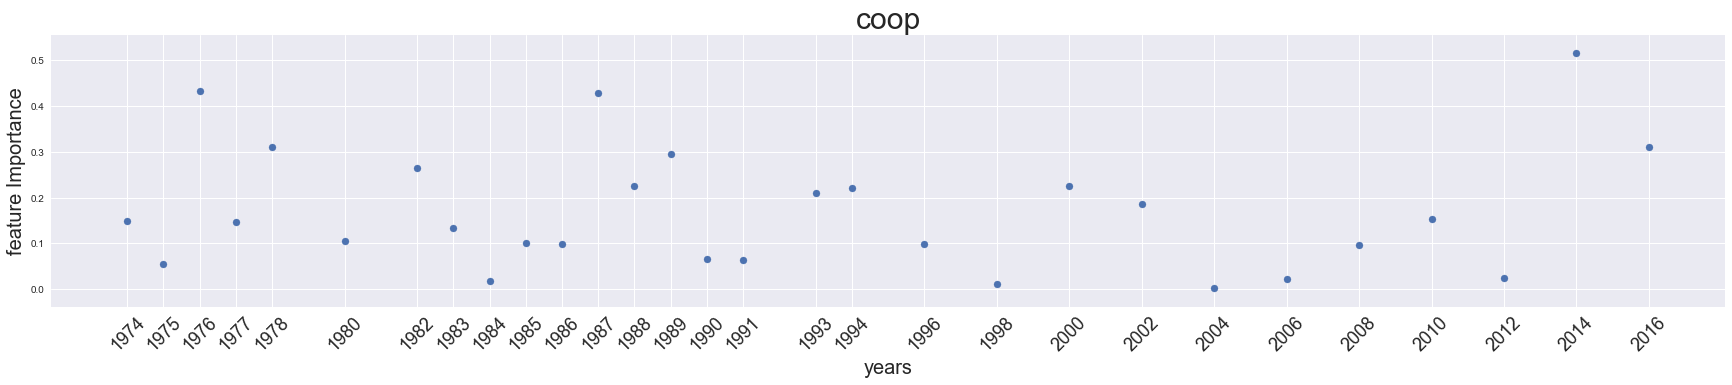

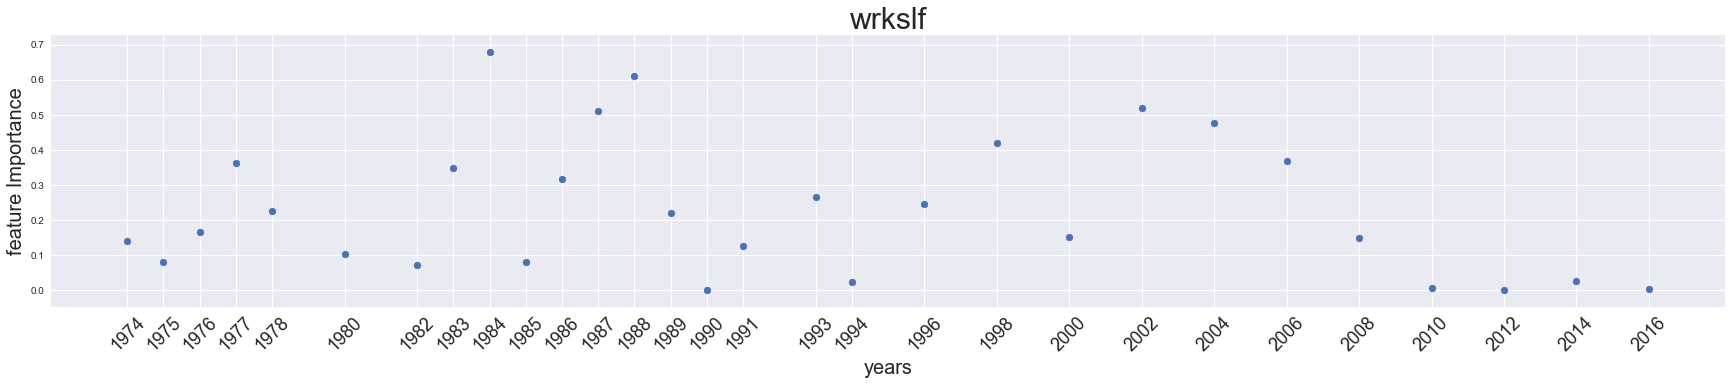

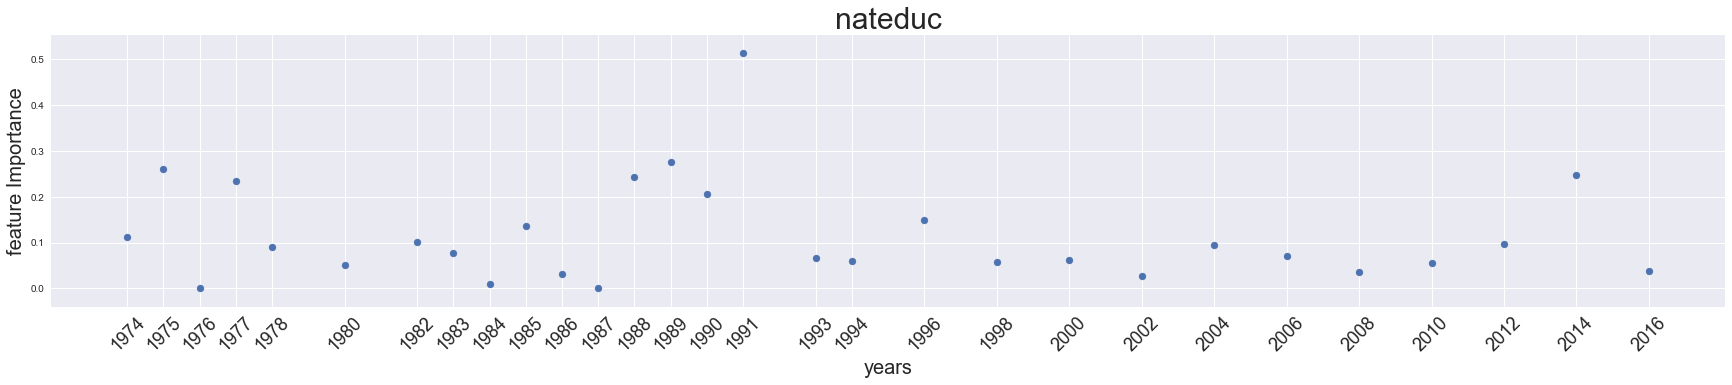

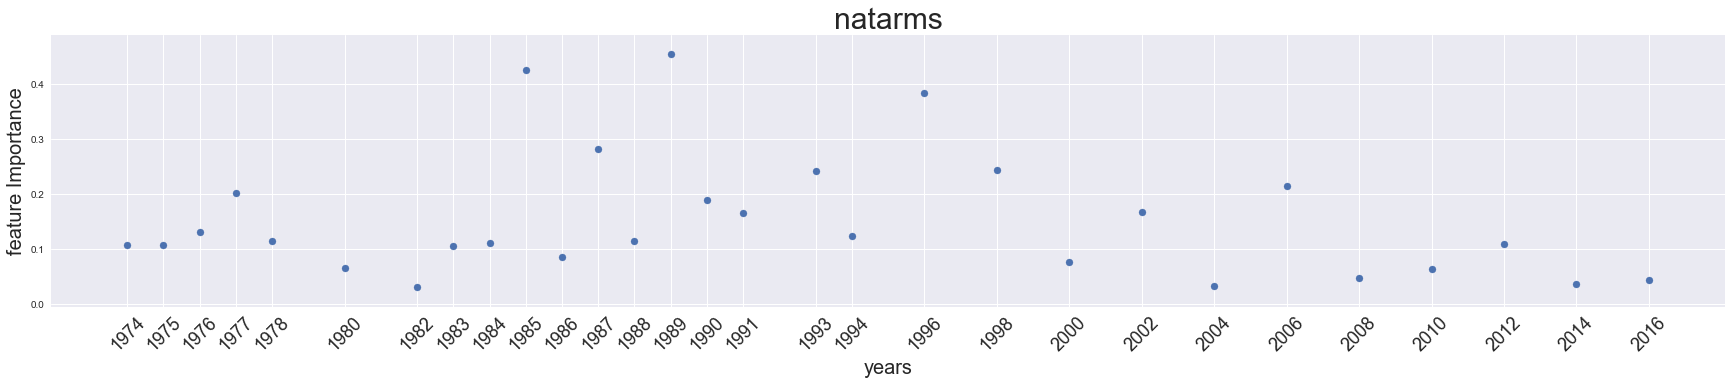

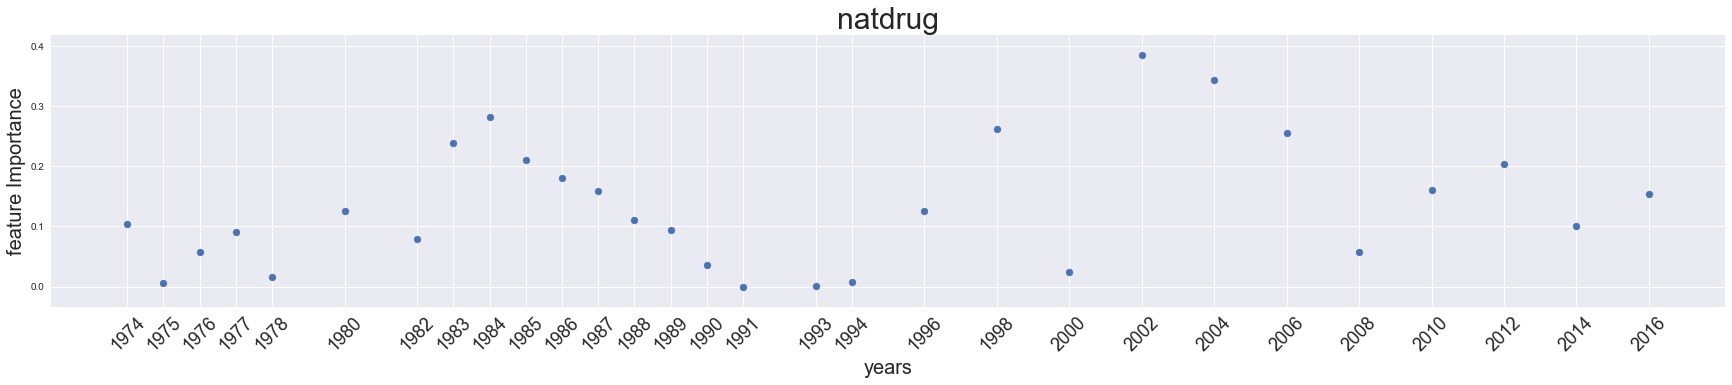

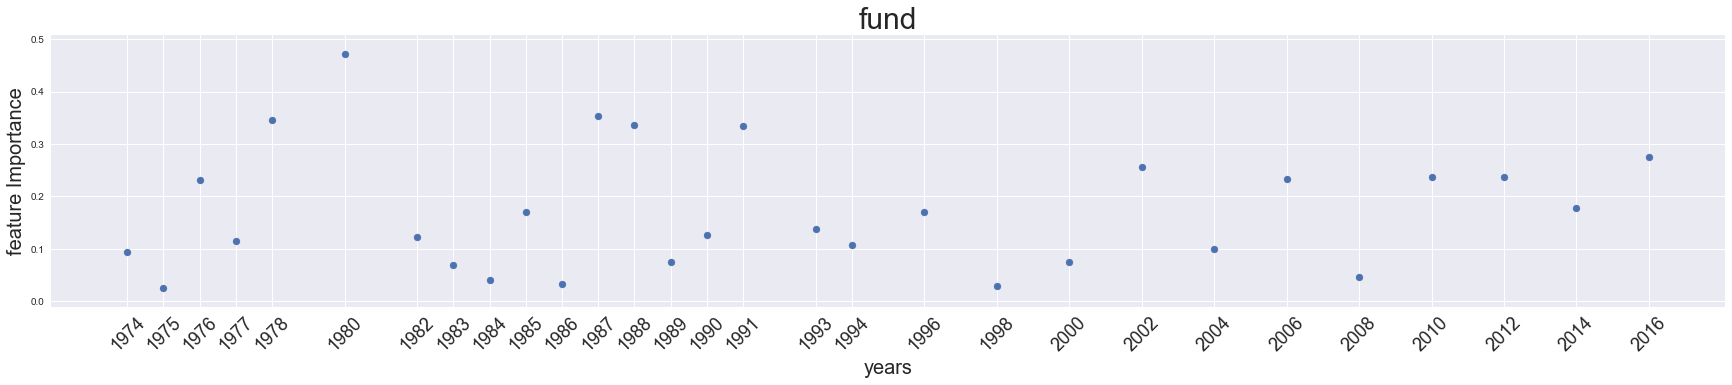

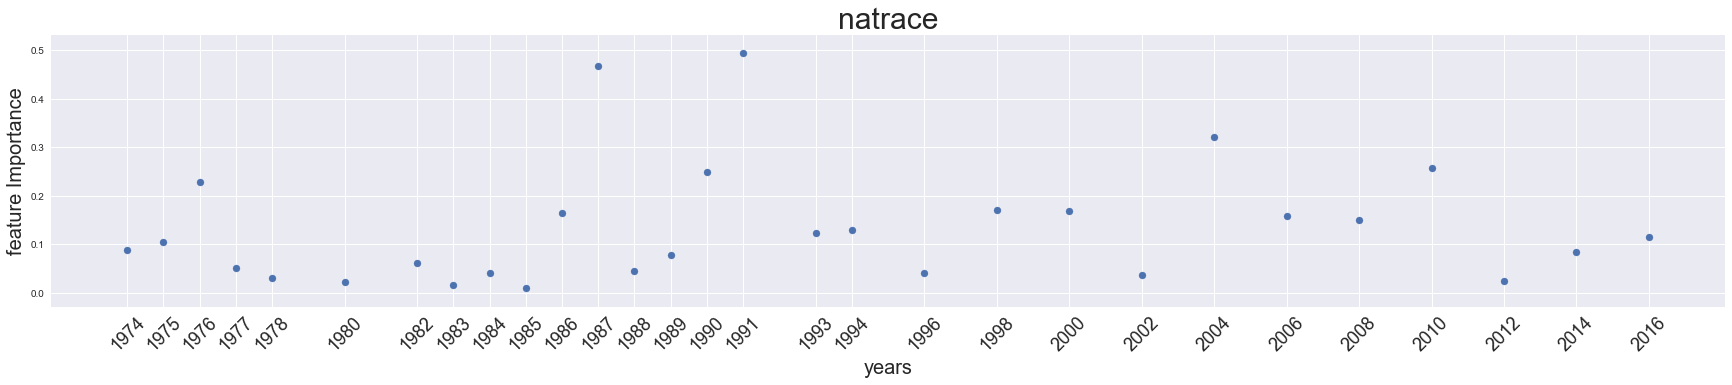

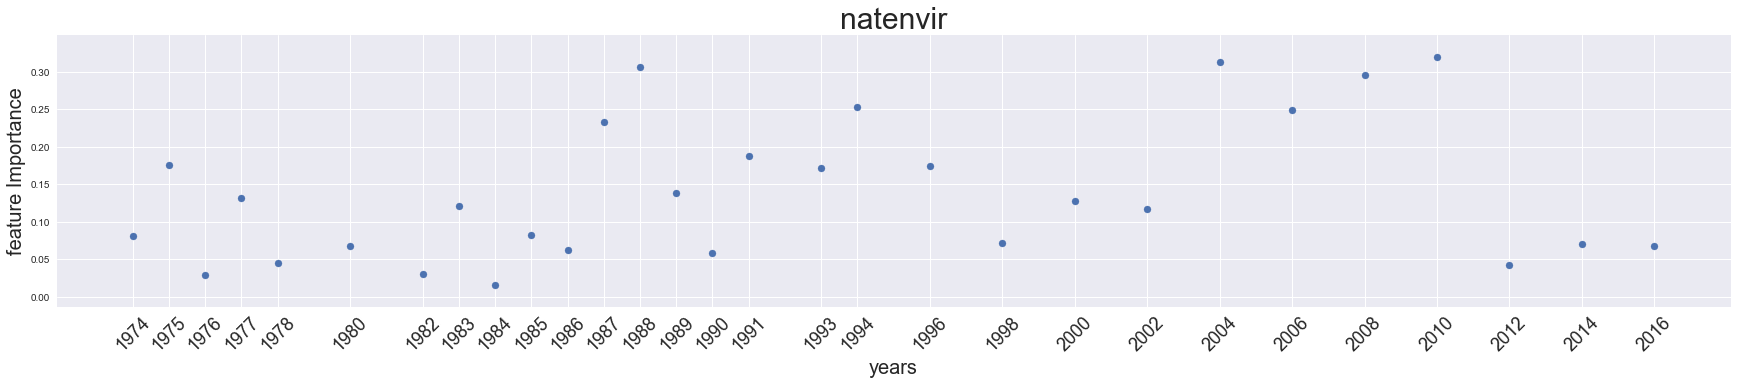

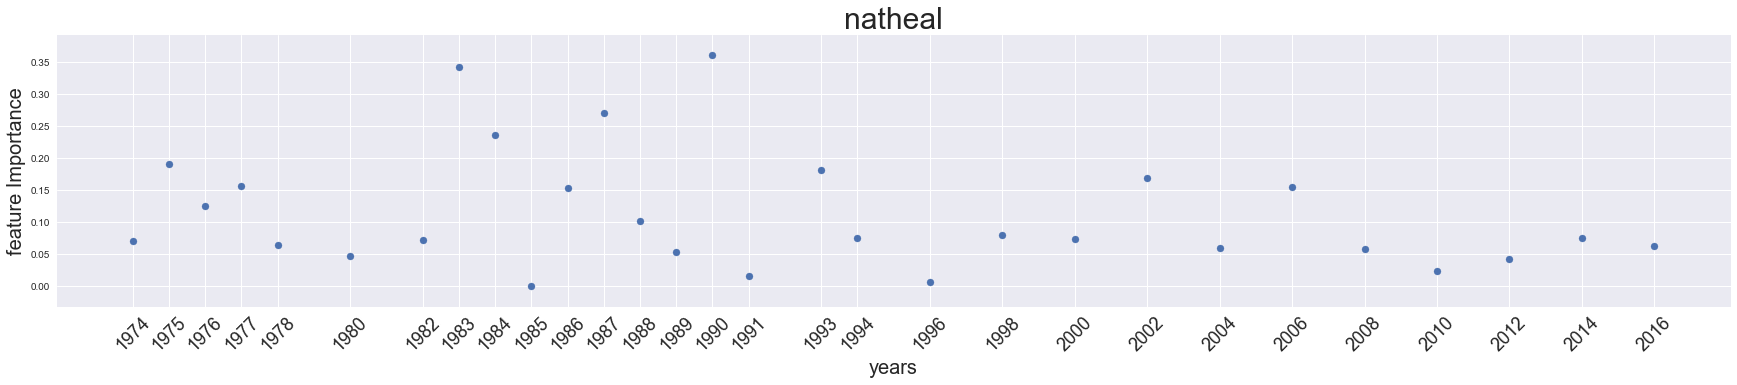

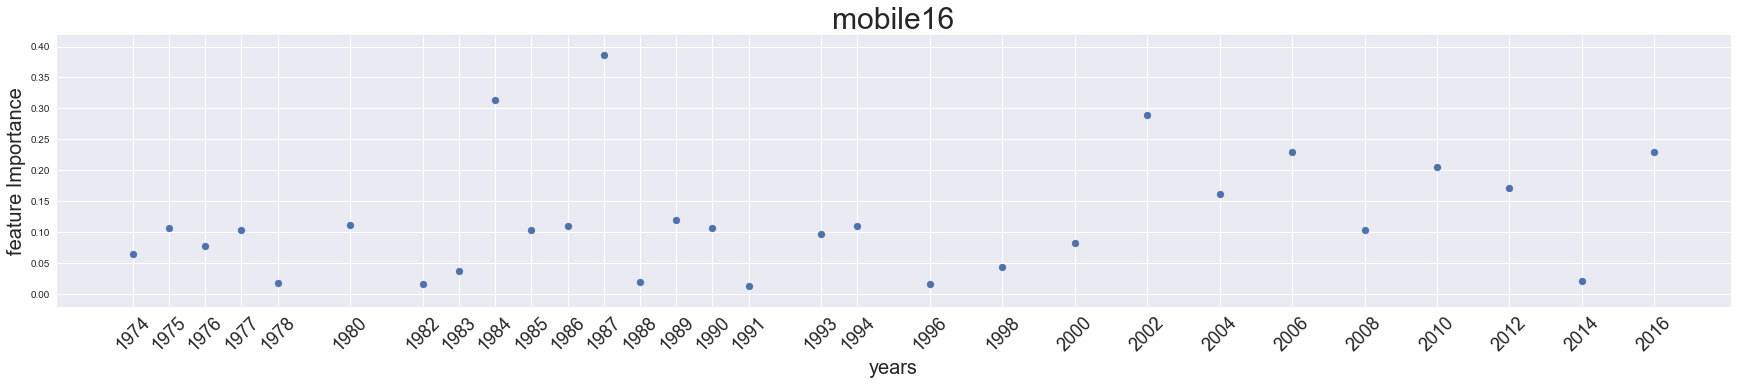

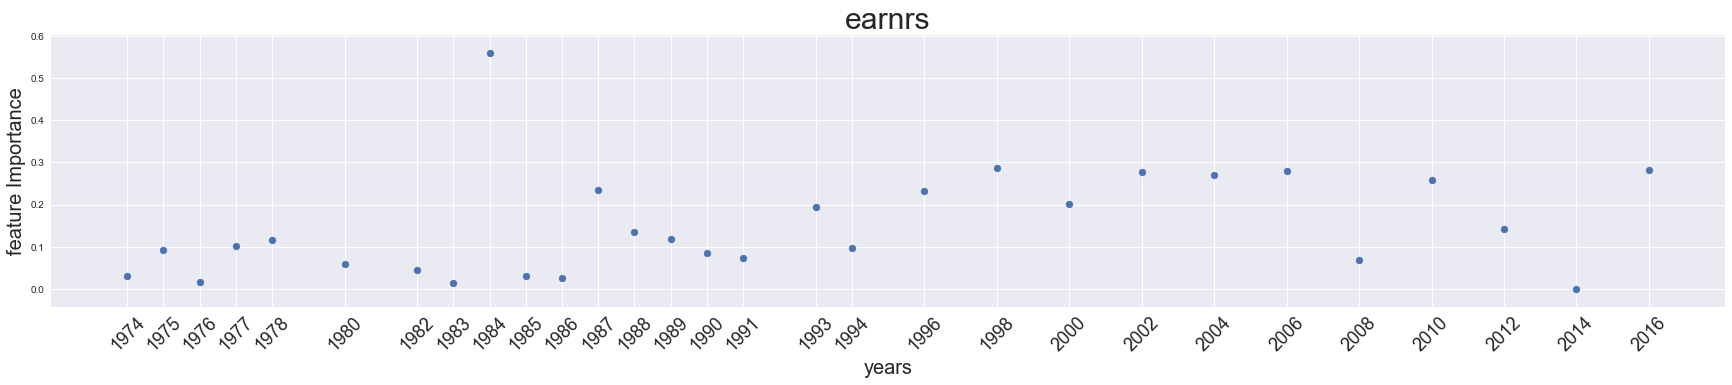

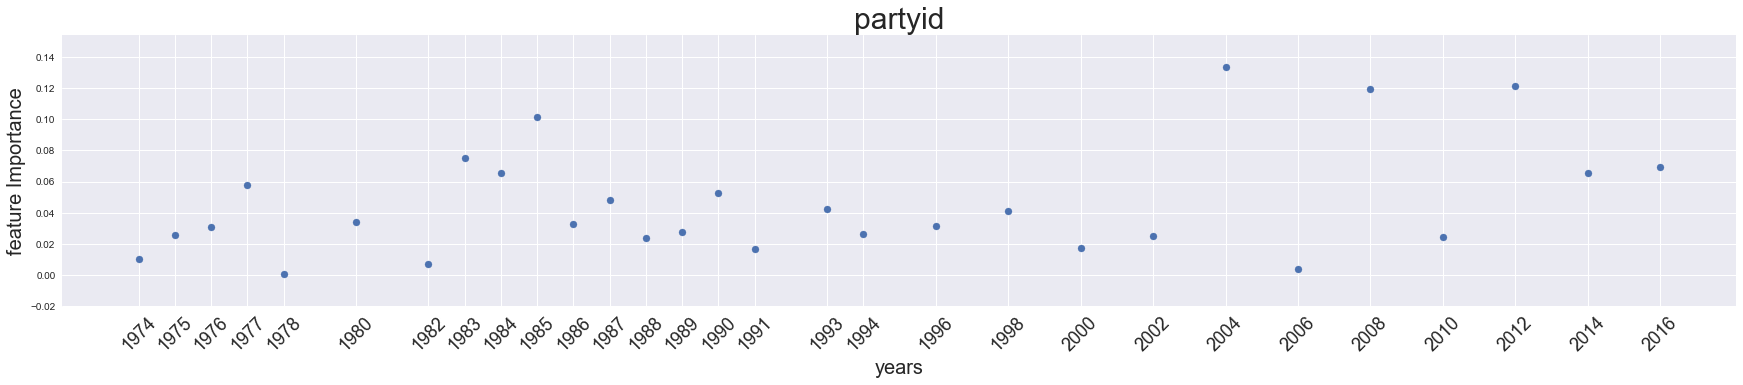

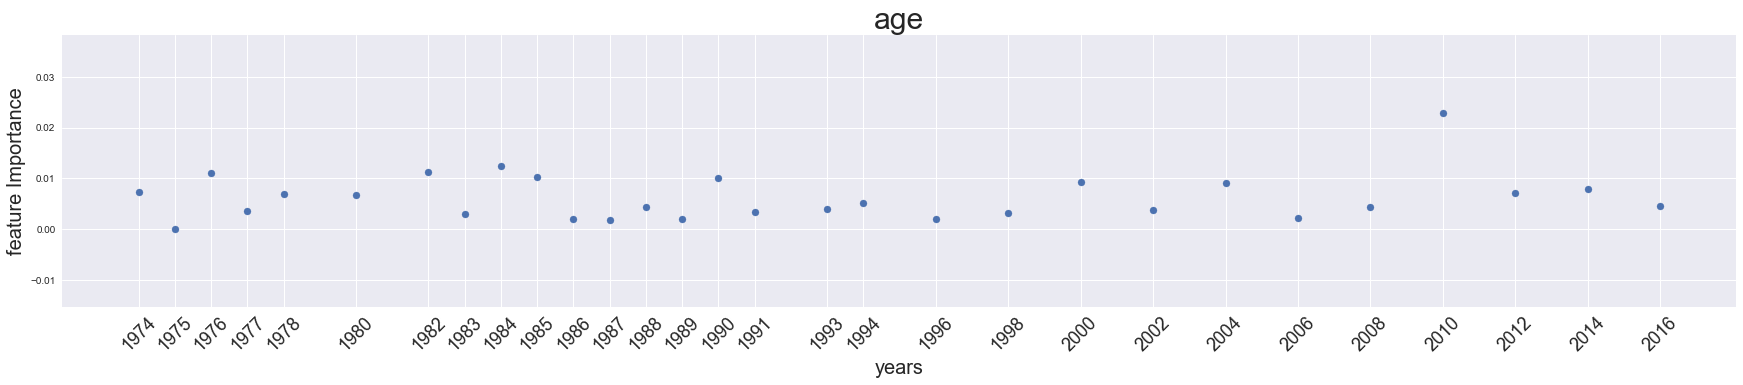

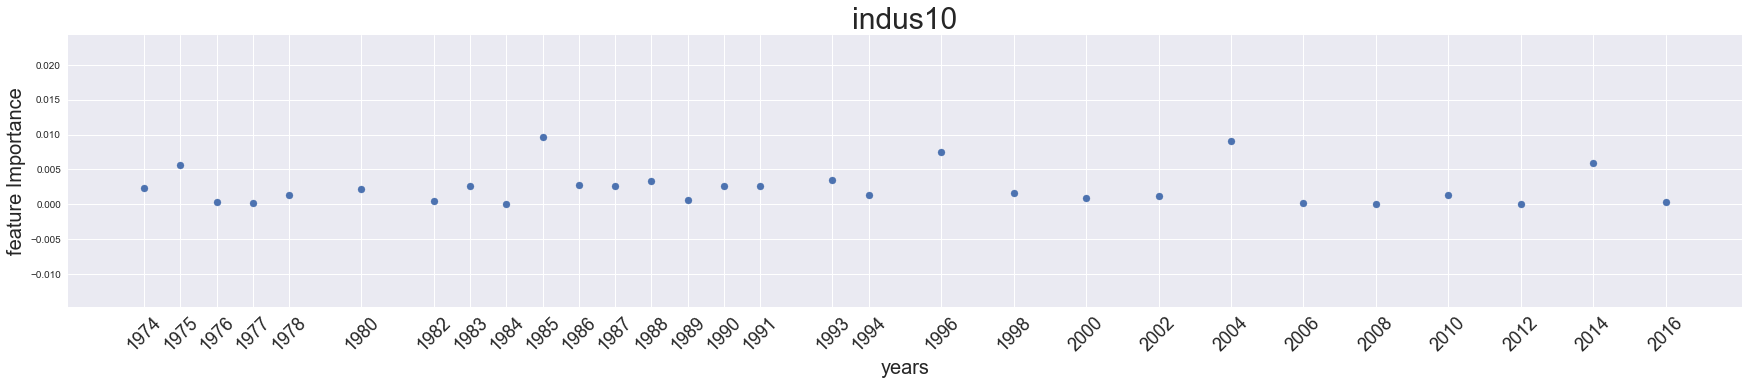

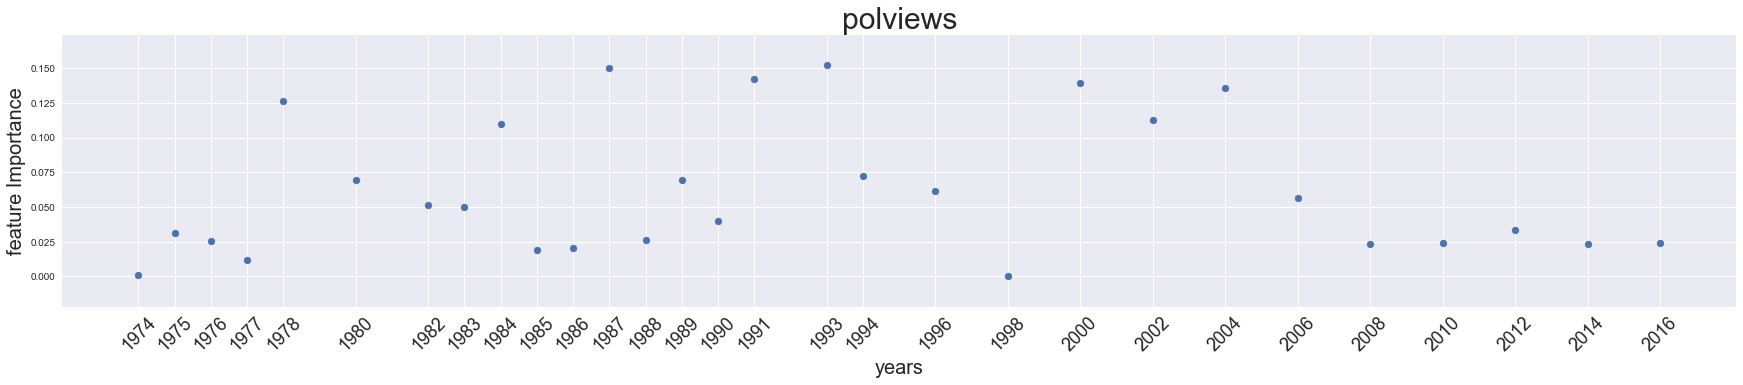

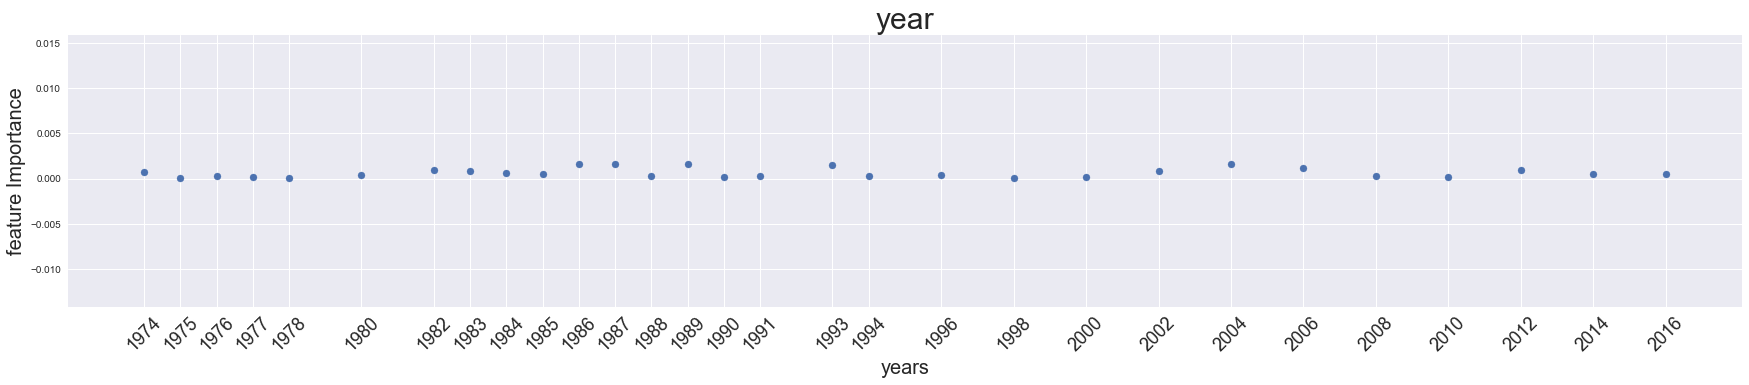

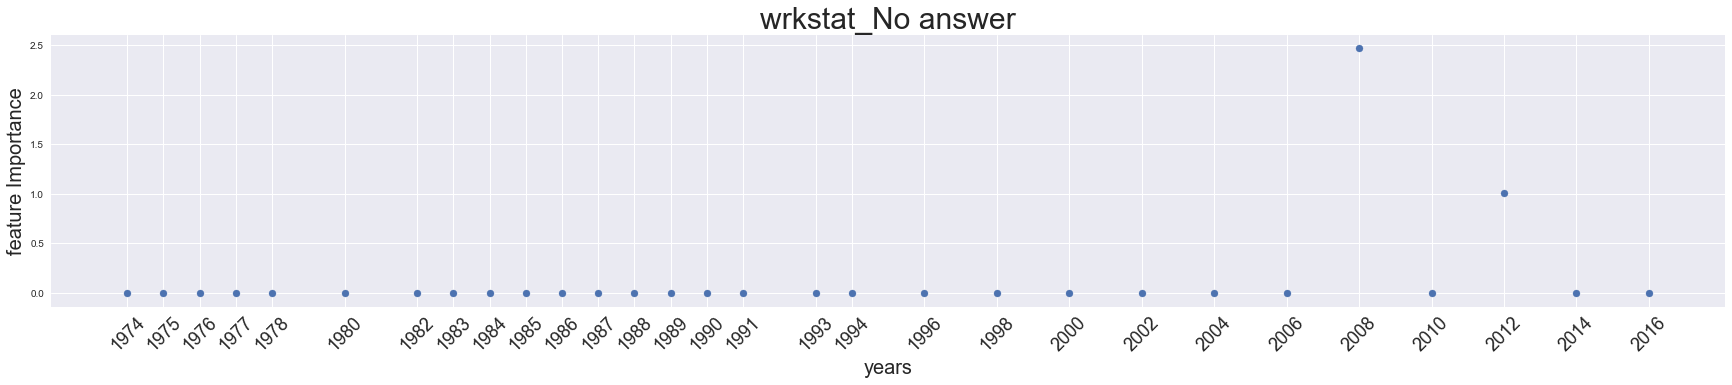

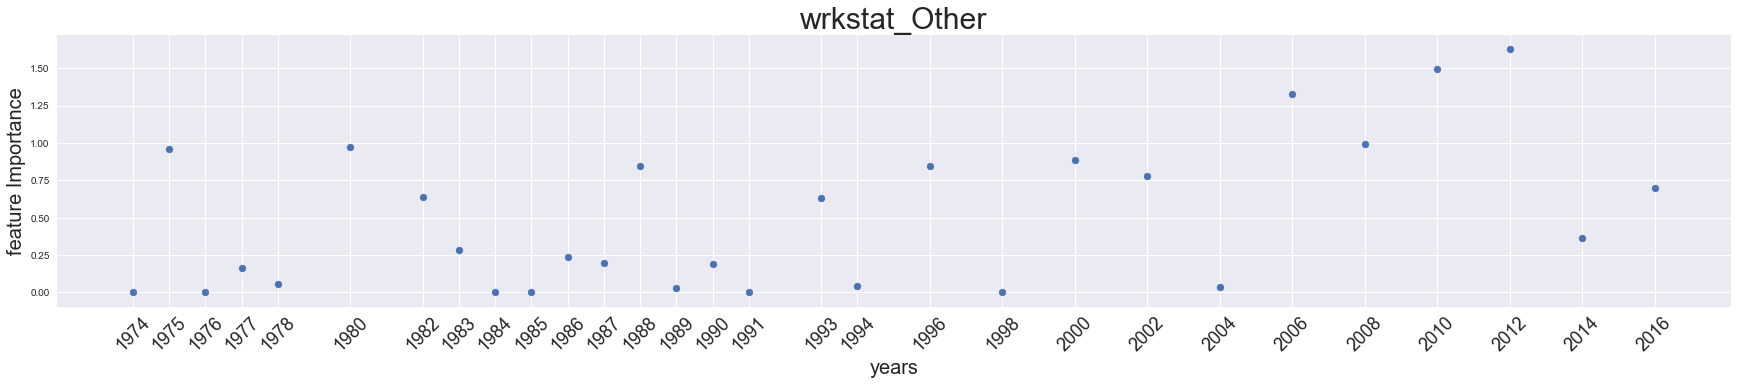

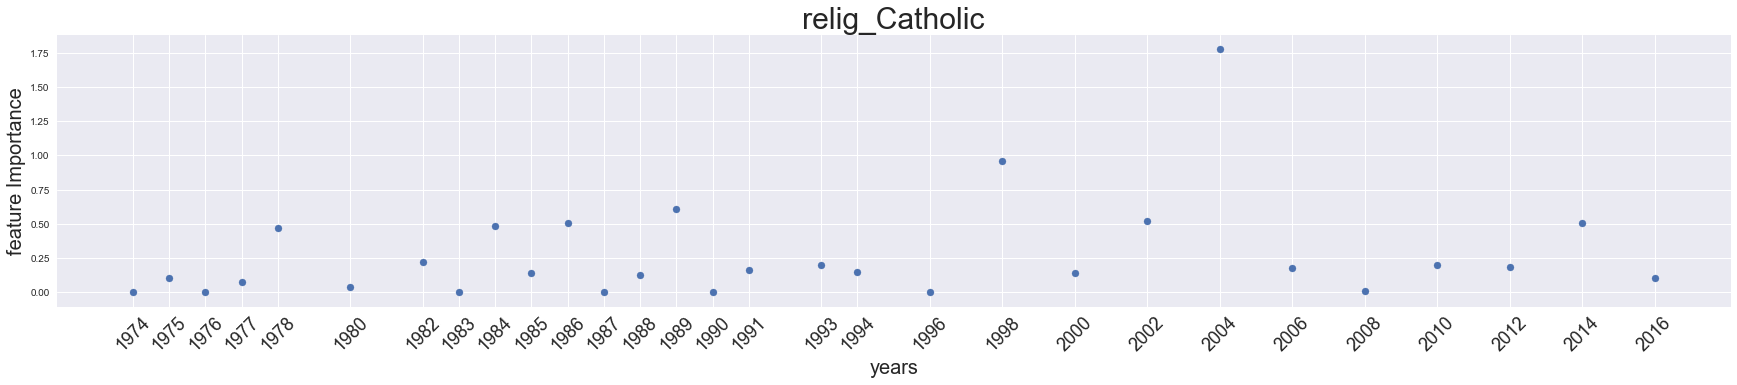

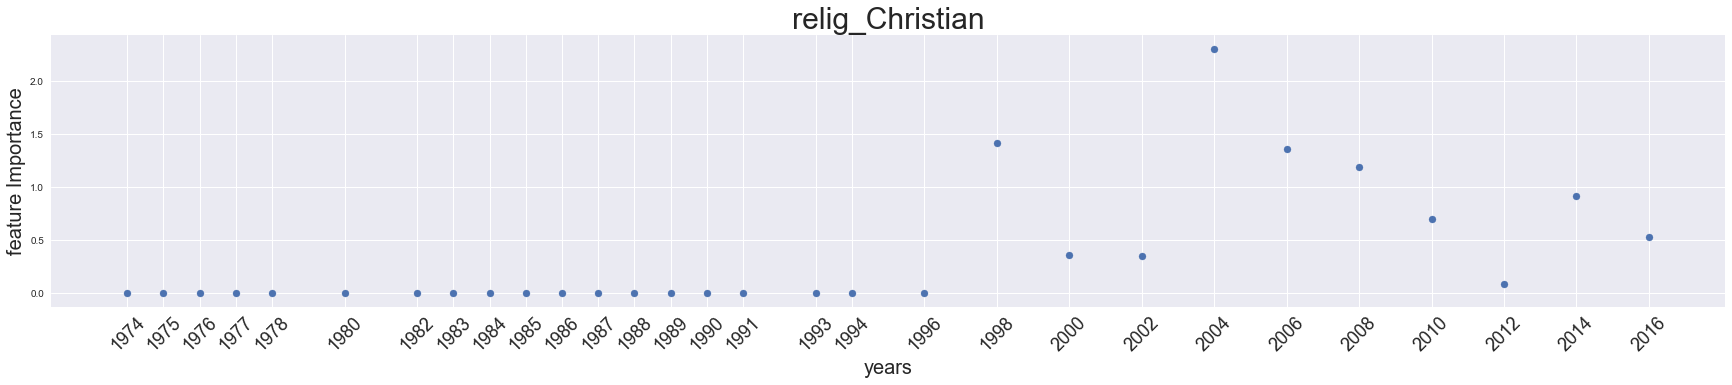

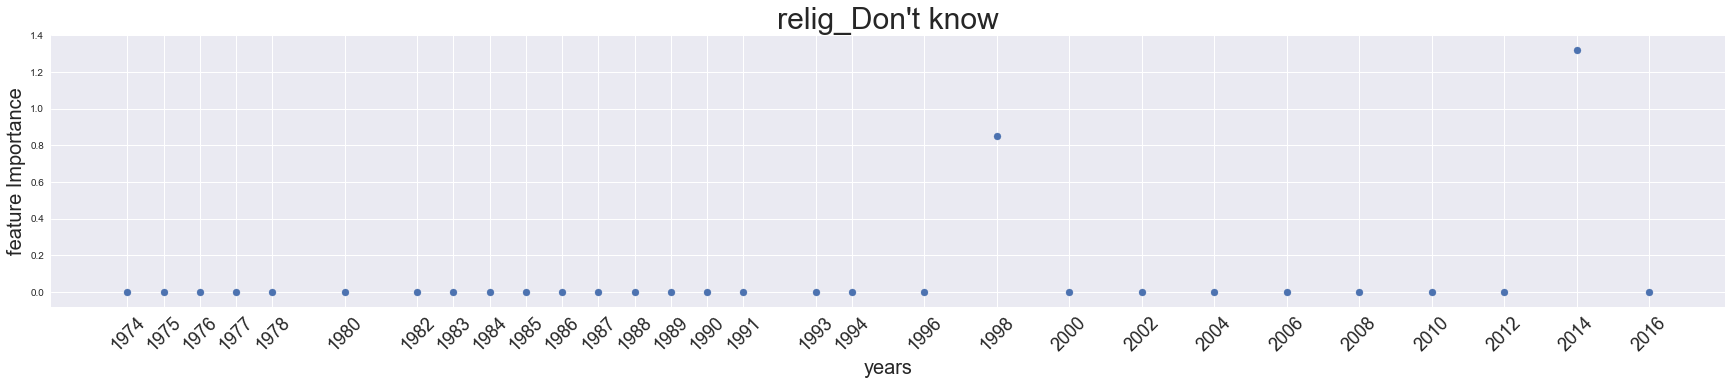

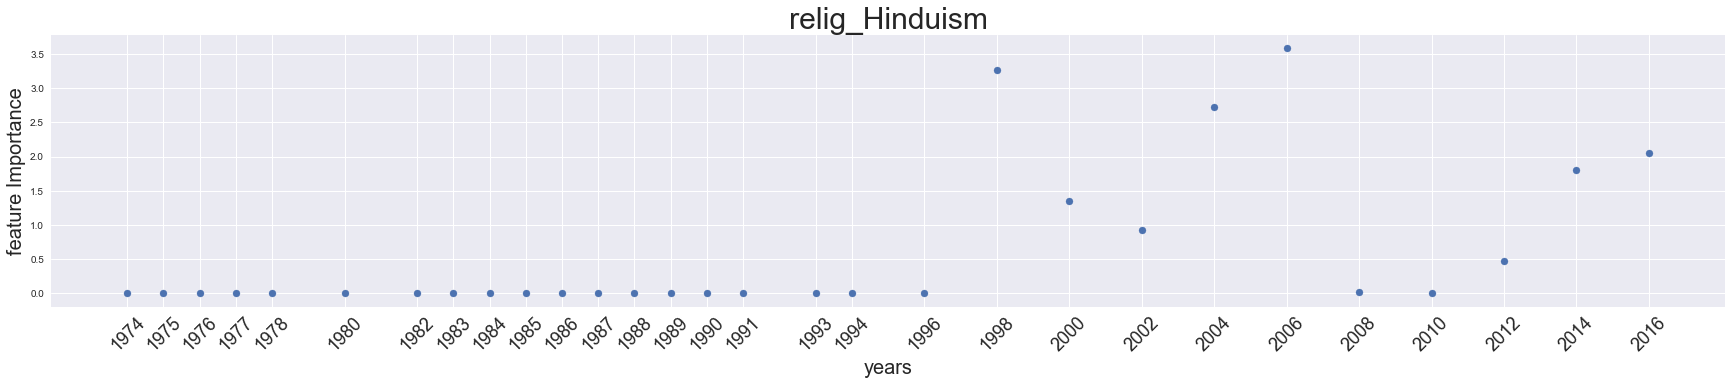

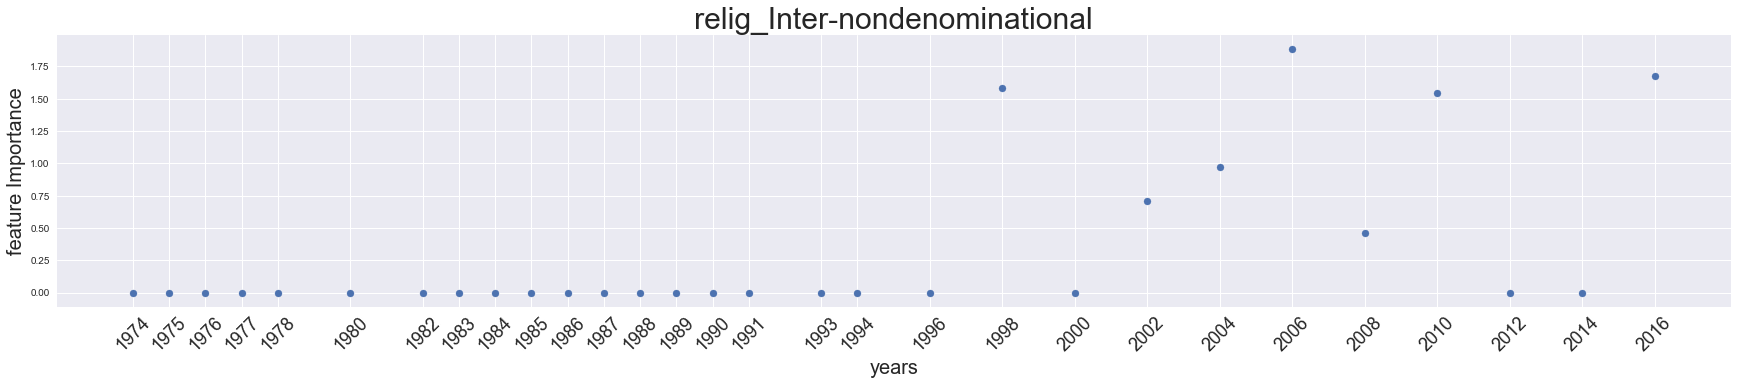

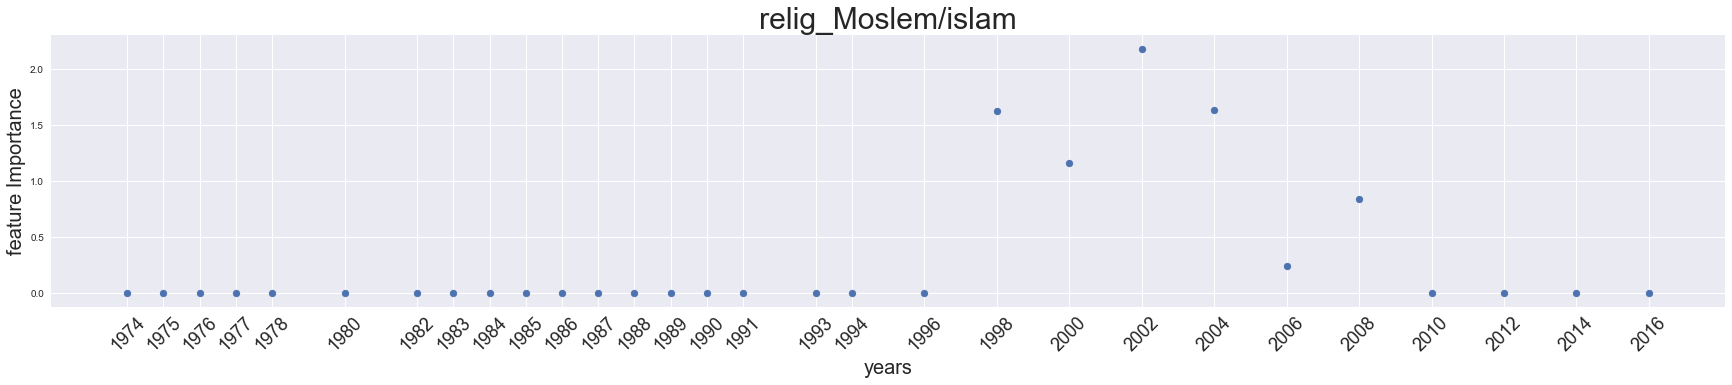

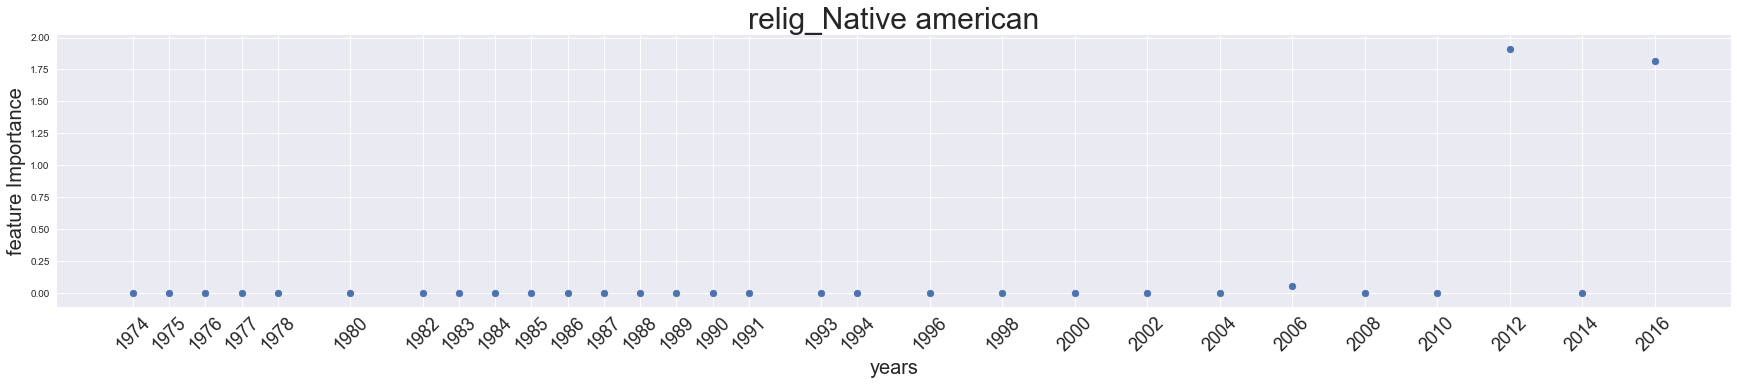

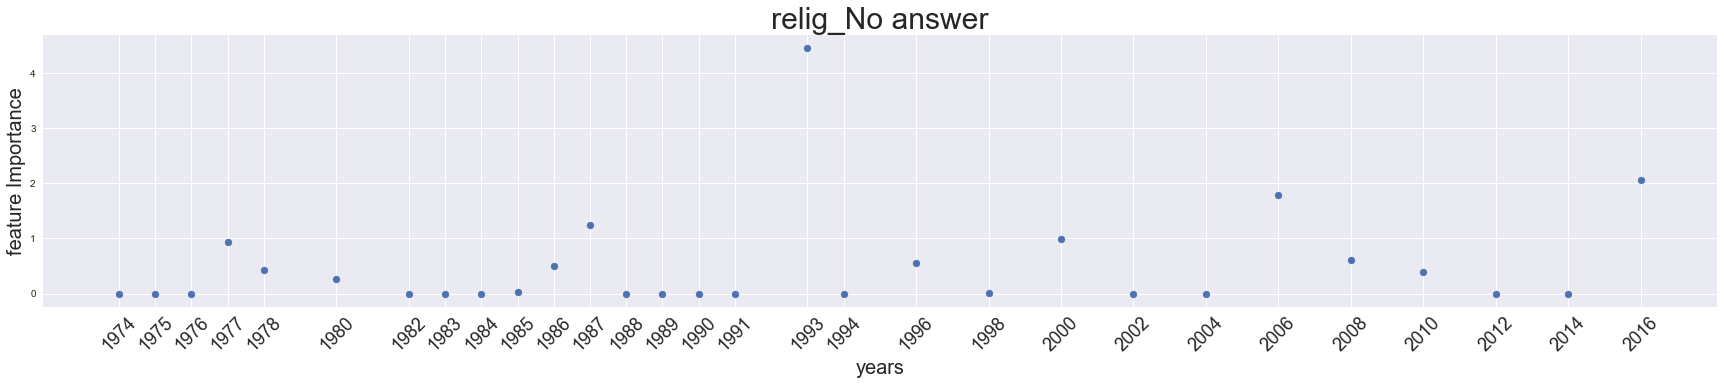

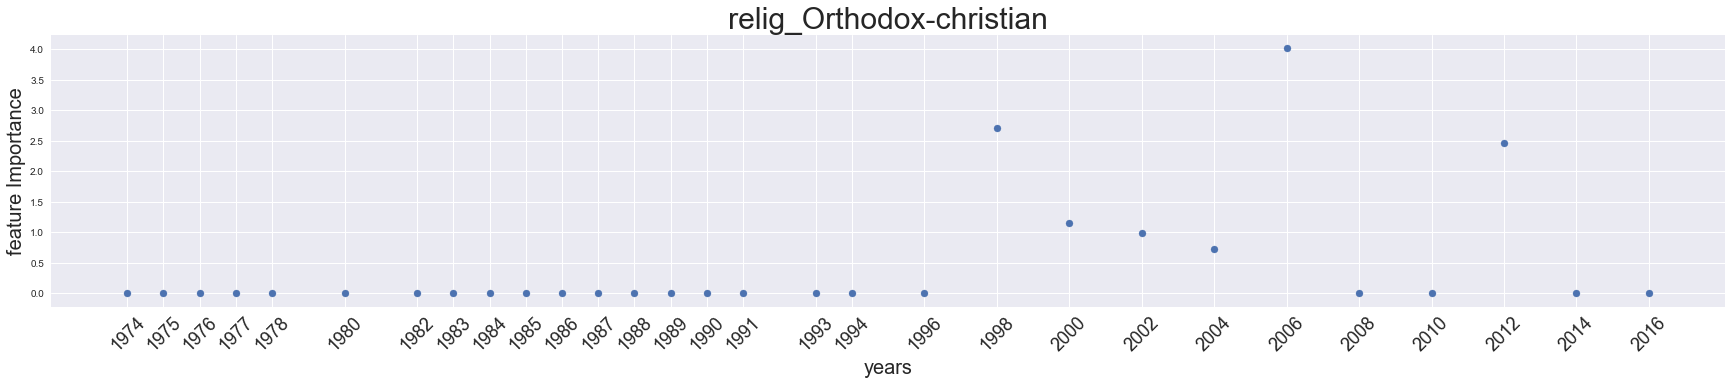

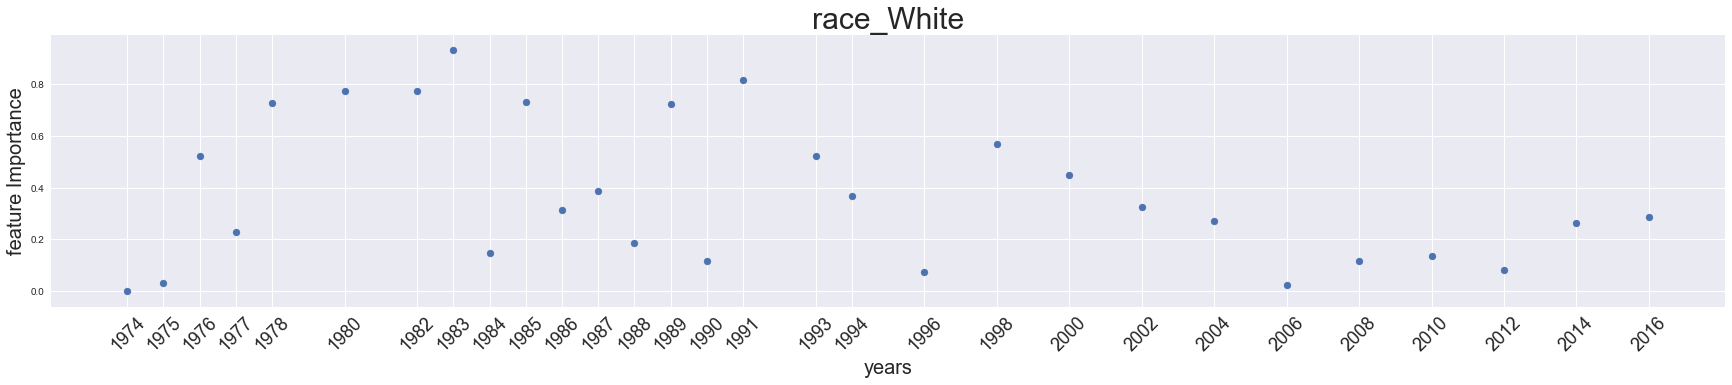

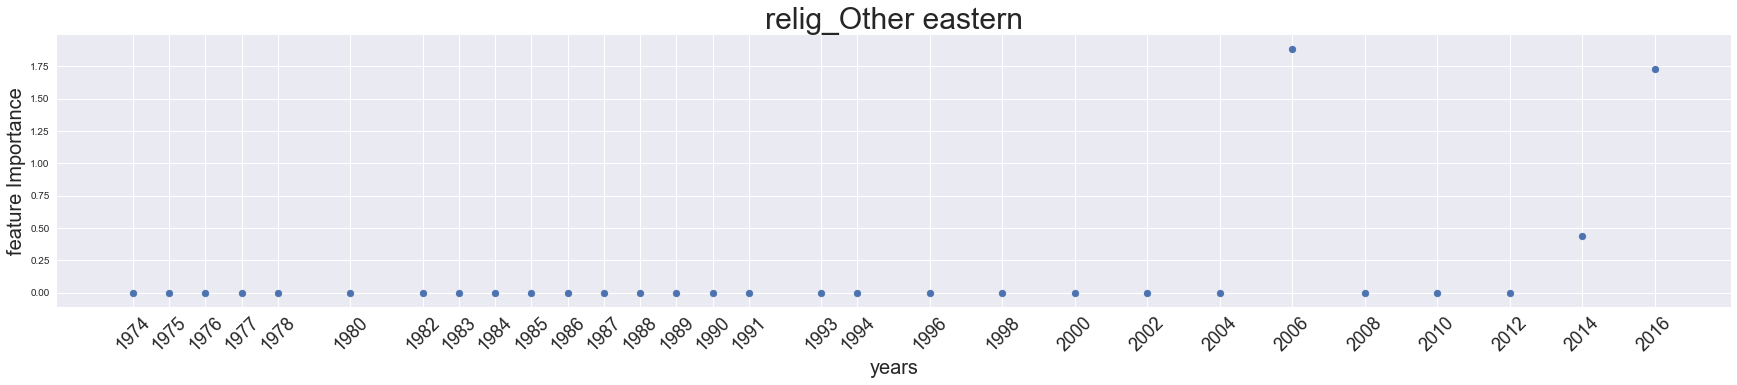

In [30]:
years = [1974, 1975, 1976, 1977, 1978, 1980, 1982, 1983, 1984, 1985, 1986, 1987, 1988,1989,
 1990, 1991, 1993, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016]

def feature_trends(feature):
    trend_list = []
    for x in feat_by_year5[feature]:
        for k,v in x.items():
            trend_list.append(v)
    return trend_list

def all_trends(features_dict):
    feat_list = defaultdict()
    for k,v in features_dict.items():
        for i in v:
            feat_list[i[0]] = i[1]
    for index, i in enumerate(feat_list):
        plt.figure(figsize=(30, 5));
        plt.scatter(years, feature_trends(i));
        plt.title(i, fontsize = 30);
        plt.xlabel('years', fontsize = 20);
        plt.ylabel('feature Importance', fontsize = 20);
        plt.xticks([x for x in years], years, fontsize = 18, rotation = 45);
        plt.show();
        
all_trends(features_dict5);

In [31]:
def Gaussian_NB(X_train_log, X_test_log, y_train_up, y_test_up):   
    nb = GaussianNB()
    nb.fit(X_train_log, y_train_up)
    nb_score = (accuracy_score(y_test_up, nb.predict(X_test_log)))
    print('GaussianNB Accuracy: ' + str(nb_score))

Gaussian_NB(X_train_log, X_test_log, y_train_up, y_test_up)

GaussianNB Accuracy: 0.319640418753


In [32]:
def SVC_(X_train_log, X_test_log, y_train_up, y_test_up): 
    svc = SVC()
    svc.fit(X_train_log, y_train_up)
    svc_score = (accuracy_score(y_test_up, svc.predict(X_test_log)))
    print('SVC Accuracy Score: ' + str(svc_score))

SVC_(X_train_log, X_test_log, y_train_up, y_test_up)

SVC Accuracy Score: 0.430018206645


In [33]:
def KNN_(X_train_log, X_test_log, y_train_up, y_test_up):    
    KNN = KNeighborsClassifier()
    KNN.fit(X_train_log, y_train_up)
    KNN_test_pred = KNN.predict(X_test_up)
    print('KNN Acccuracy:' + str(accuracy_score(y_test_up,KNN_test_pred)))
    
KNN_(X_train_log, X_test_log, y_train_up, y_test_up)

KNN Acccuracy:0.17375967228
